<div style="text-align: center;">
  <h1 style="color: olive;">Assessing Radon Levels in Colorado and Surrounding States</h1>
    <h1 style="color: lightpink;">by Jessica Reyes</h1>
</div>

<font color = grey>*This project seeks to analyze radon data to better understand its regional impacts. My personal interest in this topic arises from my own experience with radon detection in my current home. I was deeply concerned when I discovered that my lease contained at least 10 pages of disclosures regarding radon risks. Learning about the health risks associated with radon and its carcinogenic properties was alarming. This has sparked my curiosity about how radon levels are affecting different areas of Colorado and the surrounding states.*<font>

In [41]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import numpy as np

In [40]:
#CO Shape file
df_CO = pd.read_csv("C:\\Users\\Owner\\Desktop\\Spring_2025\\DSCI235\\HW\\Project\\data\\data_CO.csv")
regions_CO = "C:\\Users\\Owner\\Desktop\\Spring_2025\\DSCI235\\HW\\Project\\shapefile\\CO\\tl_2024_08_cousub.shp"  
gdf_regions_CO = gpd.read_file(regions_CO)

# Check available columns
#print(gdf_regions_CO.columns)
#print(gdf_regions_CO.head())

# Plot subdivisions
#gdf_regions_CO.plot()

#NM Shape file
df_NM = pd.read_csv("C:\\Users\\Owner\\Desktop\\Spring_2025\\DSCI235\\HW\\Project\\data\\data_NM.csv")
regions_NM = "C:\\Users\\Owner\\Desktop\\Spring_2025\\DSCI235\\HW\\Project\\shapefile\\NM\\tl_2024_35_cousub.shp"  
gdf_regions_NM = gpd.read_file(regions_NM)

# Check available columns
#print(gdf_regions_NM.columns)
#print(gdf_regions_NM.head())

# Plot subdivisions
#gdf_regions_NM.plot()

#OK Shape file
df_OK = pd.read_csv("C:\\Users\\Owner\\Desktop\\Spring_2025\\DSCI235\\HW\\Project\\data\\data_OK.csv")
regions_OK = "C:\\Users\\Owner\\Desktop\\Spring_2025\\DSCI235\\HW\\Project\\shapefile\\OK\\tl_2024_40_cousub.shp"  
gdf_regions_OK = gpd.read_file(regions_OK)

# Check available columns
#print(gdf_regions_OK.columns)
#print(gdf_regions_OK.head())

# Plot subdivisions
#gdf_regions_OK.plot()

#KS Shape file
df_KS = pd.read_csv("C:\\Users\\Owner\\Desktop\\Spring_2025\\DSCI235\\HW\\Project\\data\\data_KS.csv")
regions_KS = "C:\\Users\\Owner\\Desktop\\Spring_2025\\DSCI235\\HW\\Project\\shapefile\\KS\\tl_2024_20_cousub.shp"  
gdf_regions_KS = gpd.read_file(regions_KS)

# Check available columns
#print(gdf_regions_KS.columns)
#print(gdf_regions_KS.head())

# Plot subdivisions
#gdf_regions_KS.plot()

#NE Shape file
df_NE = pd.read_csv("C:\\Users\\Owner\\Desktop\\Spring_2025\\DSCI235\\HW\\Project\\data\\data_NE.csv")
regions_NE = "C:\\Users\\Owner\\Desktop\\Spring_2025\\DSCI235\\HW\\Project\\shapefile\\NE\\tl_2024_31_cousub.shp"  
gdf_regions_NE = gpd.read_file(regions_NE)

# Check available columns
#print(gdf_regions_NE.columns)
#print(gdf_regions_NE.head())

# Plot subdivisions
#gdf_regions_NE.plot()

#WY Shape file
df_WY = pd.read_csv("C:\\Users\\Owner\\Desktop\\Spring_2025\\DSCI235\\HW\\Project\\data\\data_WY.csv")
regions_WY = "C:\\Users\\Owner\\Desktop\\Spring_2025\\DSCI235\\HW\\Project\\shapefile\\WY\\tl_2024_56_cousub.shp"  
gdf_regions_WY = gpd.read_file(regions_WY)

# Check available columns
#print(gdf_regions_WY.columns)
#print(gdf_regions_WY.head())

# Plot subdivisions
#gdf_regions_WY.plot()

#UT Shape file
df_UT = pd.read_csv("C:\\Users\\Owner\\Desktop\\Spring_2025\\DSCI235\\HW\\Project\\data\\data_UT.csv")
regions_UT = "C:\\Users\\Owner\\Desktop\\Spring_2025\\DSCI235\\HW\\Project\\shapefile\\UT\\tl_2024_49_cousub.shp"  
gdf_regions_UT = gpd.read_file(regions_UT)

# Check available columns
#print(gdf_regions_UT.columns)
#print(gdf_regions_UT.head())

# Plot subdivisions
#gdf_regions_UT.plot()

#AZ Shape file
df_AZ = pd.read_csv("C:\\Users\\Owner\\Desktop\\Spring_2025\\DSCI235\\HW\\Project\\data\\data_AZ.csv")
regions_AZ = "C:\\Users\\Owner\\Desktop\\Spring_2025\\DSCI235\\HW\\Project\\shapefile\\AZ\\tl_2024_04_cousub.shp"  
gdf_regions_AZ = gpd.read_file(regions_AZ)

# Check available columns
#print(gdf_regions_AZ.columns)
#print(gdf_regions_AZ.head())

# Plot subdivisions
#gdf_regions_AZ.plot()

<div style="text-align: center;">
  <h1 style="color: olive;">Colorado Radon Levels</h1>
</div>

<font color = darkgreen>*Research Q1: How do radon levels compare in each county & surrounding states of Colorado?*<font>

<font color = grey>*(Displaying Colorado and its surrounding states—first individually, then together—to visually examine how radon is distributed across counties in each state.)*<font>

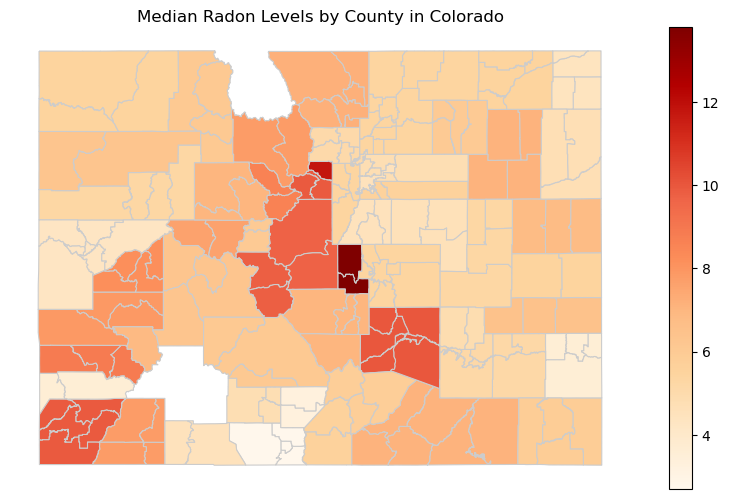

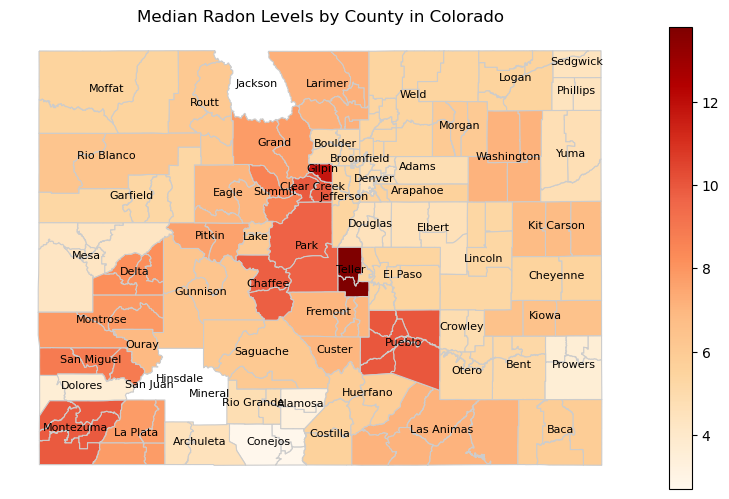

In [4]:
#Colorado
#CO regions
df_CO["CountyFIPS"] = df_CO["CountyFIPS"].astype(str).str.zfill(5)

gdf_regions_CO["COUNTYFP"] = gdf_regions_CO["COUNTYFP"].astype(str).str.zfill(3)
gdf_regions_CO["STATEFP"] = gdf_regions_CO["STATEFP"].astype(str).str.zfill(2)
gdf_regions_CO["CountyFIPS"] = gdf_regions_CO["STATEFP"] + gdf_regions_CO["COUNTYFP"]

#Merge datasets
merged_gdf_CO = gdf_regions_CO.merge(df_CO, on="CountyFIPS", how="left")

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf_CO.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Median Radon Levels by County in Colorado')
ax.set_axis_off()

plt.show()

# Plot the choropleth map with Counties
merged_gdf_CO = merged_gdf_CO.to_crs(epsg=3857)

# Compute centroids and retain as a GeoDataFrame
county_centroids = merged_gdf_CO.dissolve(by='County').centroid
county_centroids = county_centroids.to_frame(name='geometry')  
county_centroids['County'] = county_centroids.index  

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf_CO.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add county names at centroid positions
for idx, row in county_centroids.iterrows():
    ax.annotate(text=row['County'], xy=(row.geometry.x, row.geometry.y), 
                xytext=(0, 0), textcoords="offset points", fontsize=8,
                ha='center', color='black')

# Customize the plot
ax.set_title('Median Radon Levels by County in Colorado')
ax.set_axis_off()

plt.show()

<font color = grey>*Colorado shows extremely high radon levels near the center of the state. Anything above a 4 would be considered high levels of radon where further action would be needed to mitigate the radon levels to be below 4 pCi/L.*<font>

<div style="text-align: center;">
  <h1 style="color: olive;">New Mexico Radon Levels</h1>
</div>

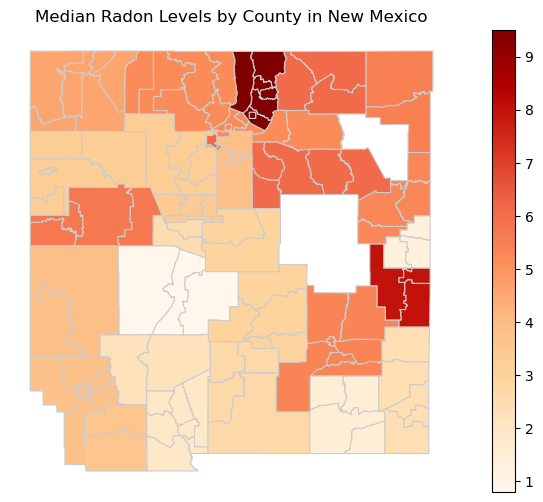

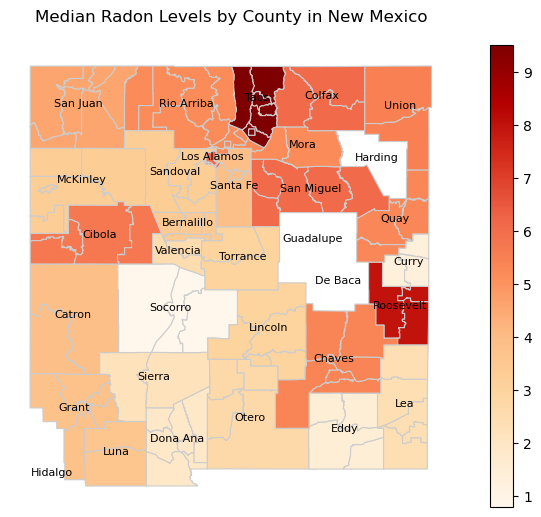

In [5]:
#New Mexico
# NM regions
df_NM["CountyFIPS"] = df_NM["CountyFIPS"].astype(str).str.zfill(5)

gdf_regions_NM["COUNTYFP"] = gdf_regions_NM["COUNTYFP"].astype(str).str.zfill(3)
gdf_regions_NM["STATEFP"] = gdf_regions_NM["STATEFP"].astype(str).str.zfill(2)
gdf_regions_NM["CountyFIPS"] = gdf_regions_NM["STATEFP"] + gdf_regions_NM["COUNTYFP"]

#Merge datasets
merged_gdf_NM = gdf_regions_NM.merge(df_NM, on="CountyFIPS", how="left")

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf_NM.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Median Radon Levels by County in New Mexico')
ax.set_axis_off()

plt.show()

# Plot the choropleth map with Counties
merged_gdf_NM = merged_gdf_NM.to_crs(epsg=3857)

# Compute centroids and retain as a GeoDataFrame
county_centroids = merged_gdf_NM.dissolve(by='County').centroid
county_centroids = county_centroids.to_frame(name='geometry')  
county_centroids['County'] = county_centroids.index  

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf_NM.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add county names at centroid positions
for idx, row in county_centroids.iterrows():
    ax.annotate(text=row['County'], xy=(row.geometry.x, row.geometry.y), 
                xytext=(0, 0), textcoords="offset points", fontsize=8,
                ha='center', color='black')

# Customize the plot
ax.set_title('Median Radon Levels by County in New Mexico')
ax.set_axis_off()

plt.show()

<font color =grey>*New Mexico is showing extreme levels of radon in the NE part of the state.*<font>

<div style="text-align: center;">
  <h1 style="color: olive;">Oklahoma Radon Levels</h1>
</div>

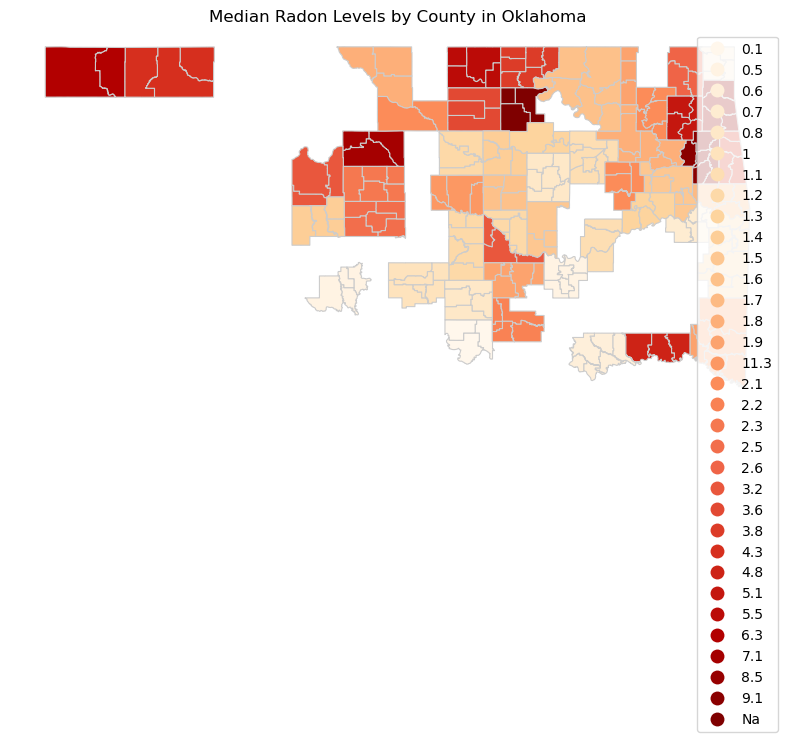

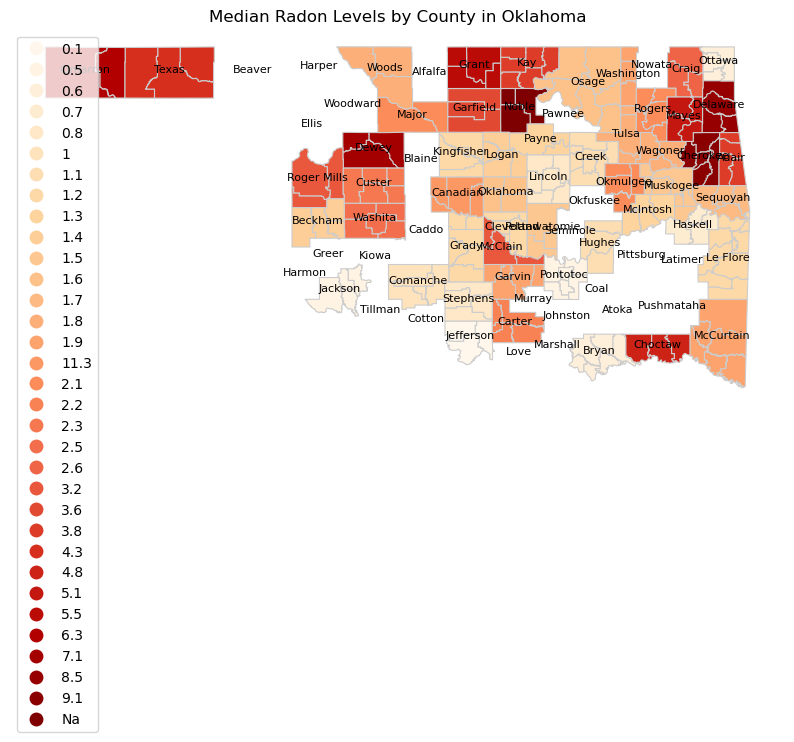

In [6]:
#Oklahoma
# OK regions
df_OK["CountyFIPS"] = df_OK["CountyFIPS"].astype(str).str.zfill(5)

gdf_regions_OK["COUNTYFP"] = gdf_regions_OK["COUNTYFP"].astype(str).str.zfill(3)
gdf_regions_OK["STATEFP"] = gdf_regions_OK["STATEFP"].astype(str).str.zfill(2)
gdf_regions_OK["CountyFIPS"] = gdf_regions_OK["STATEFP"] + gdf_regions_OK["COUNTYFP"]

#Merge datasets
merged_gdf_OK = gdf_regions_OK.merge(df_OK, on="CountyFIPS", how="left")

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf_OK.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Median Radon Levels by County in Oklahoma')
ax.set_axis_off()

plt.show()

df_OK["Value"] = pd.to_numeric(df_OK["Value"], errors='coerce')

# Plot the choropleth map with Counties
merged_gdf_OK = merged_gdf_OK.to_crs(epsg=3857)

# Compute centroids and retain as a GeoDataFrame
county_centroids = merged_gdf_OK.dissolve(by='County').centroid
county_centroids = county_centroids.to_frame(name='geometry')  
county_centroids['County'] = county_centroids.index  

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf_OK.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add county names at centroid positions
for idx, row in county_centroids.iterrows():
    ax.annotate(text=row['County'], xy=(row.geometry.x, row.geometry.y), 
                xytext=(0, 0), textcoords="offset points", fontsize=8,
                ha='center', color='black')

# Customize the plot
ax.set_title('Median Radon Levels by County in Oklahoma')
ax.set_axis_off()

plt.show()

<font color = grey>*Oklahoma is lacking a lot of testing in multiple counties, (explaining the NA's). With the testing data that we do have, it appears that there are higher levels of radon in the NE & NW across the state.*<font>

<div style="text-align: center;">
  <h1 style="color: olive;">Kansas Radon Levels</h1>
</div>

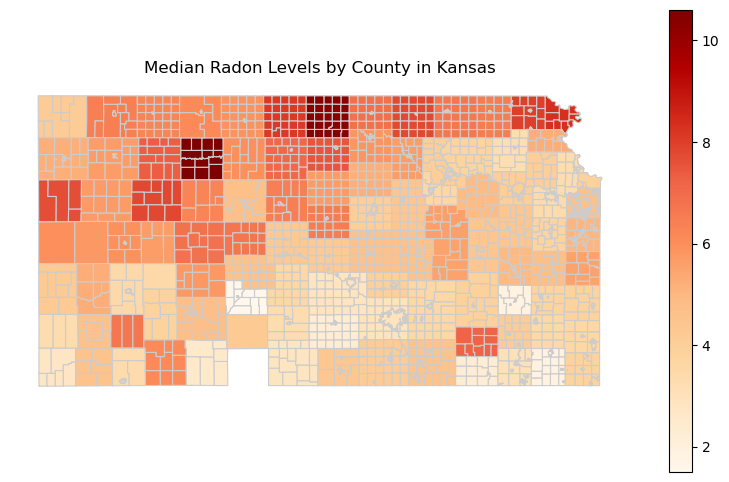

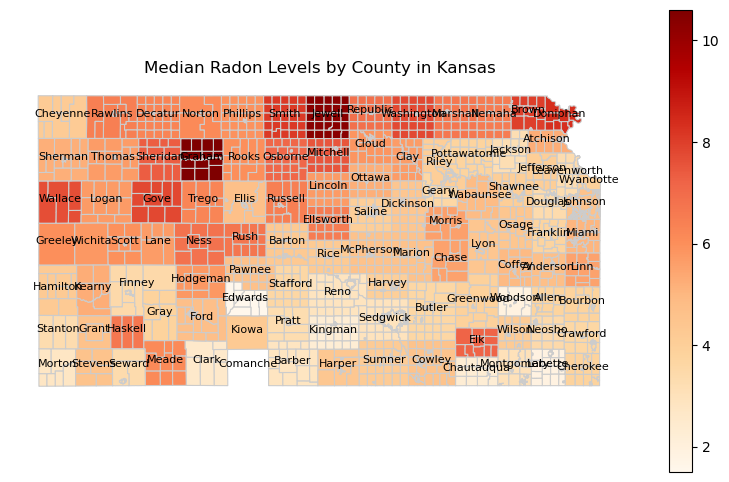

In [7]:
#Kansas
#KS regions
df_KS["CountyFIPS"] = df_KS["CountyFIPS"].astype(str).str.zfill(5)

gdf_regions_KS["COUNTYFP"] = gdf_regions_KS["COUNTYFP"].astype(str).str.zfill(3)
gdf_regions_KS["STATEFP"] = gdf_regions_KS["STATEFP"].astype(str).str.zfill(2)
gdf_regions_KS["CountyFIPS"] = gdf_regions_KS["STATEFP"] + gdf_regions_KS["COUNTYFP"]

#Merge datasets
merged_gdf_KS = gdf_regions_KS.merge(df_KS, on="CountyFIPS", how="left")

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf_KS.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Median Radon Levels by County in Kansas')
ax.set_axis_off()

plt.show()

# Plot the choropleth map with Counties
merged_gdf_KS = merged_gdf_KS.to_crs(epsg=3857)

# Compute centroids and retain as a GeoDataFrame
county_centroids = merged_gdf_KS.dissolve(by='County').centroid
county_centroids = county_centroids.to_frame(name='geometry')  
county_centroids['County'] = county_centroids.index  

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf_KS.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add county names at centroid positions
for idx, row in county_centroids.iterrows():
    ax.annotate(text=row['County'], xy=(row.geometry.x, row.geometry.y), 
                xytext=(0, 0), textcoords="offset points", fontsize=8,
                ha='center', color='black')

# Customize the plot
ax.set_title('Median Radon Levels by County in Kansas')
ax.set_axis_off()

plt.show()

<font color = grey>*Kansas is showing higher radon levels across the NE & NW part of the state.*<font>

<div style="text-align: center;">
  <h1 style="color: olive;">Nebraska Radon Levels</h1>
</div>

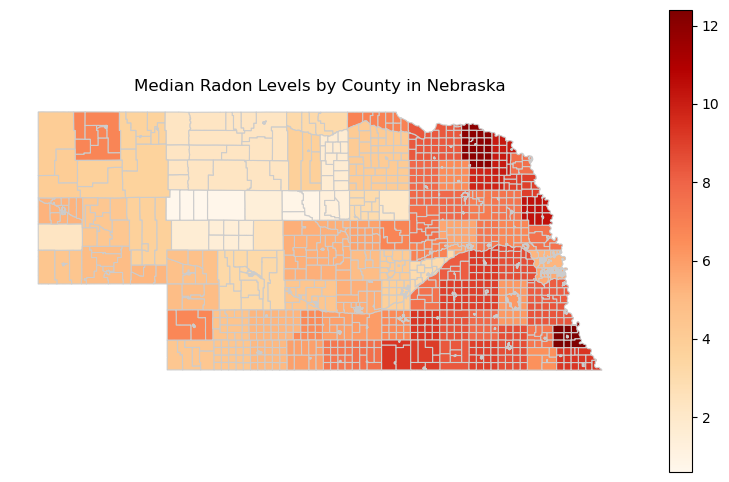

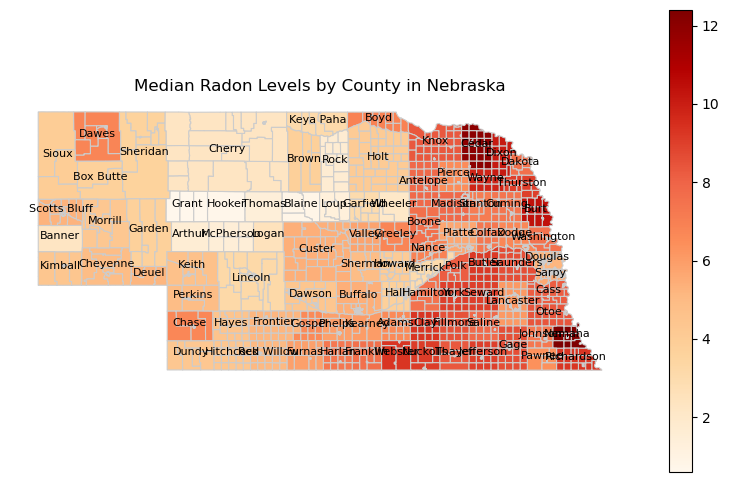

In [8]:
#Nebraska
#NE regions
df_NE["CountyFIPS"] = df_NE["CountyFIPS"].astype(str).str.zfill(5)

gdf_regions_NE["COUNTYFP"] = gdf_regions_NE["COUNTYFP"].astype(str).str.zfill(3)
gdf_regions_NE["STATEFP"] = gdf_regions_NE["STATEFP"].astype(str).str.zfill(2)
gdf_regions_NE["CountyFIPS"] = gdf_regions_NE["STATEFP"] + gdf_regions_NE["COUNTYFP"]

#Merge datasets
merged_gdf_NE = gdf_regions_NE.merge(df_NE, on="CountyFIPS", how="left")

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf_NE.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Median Radon Levels by County in Nebraska')
ax.set_axis_off()

plt.show()

# Plot the choropleth map with Counties
merged_gdf_NE = merged_gdf_NE.to_crs(epsg=3857)

# Compute centroids and retain as a GeoDataFrame
county_centroids = merged_gdf_NE.dissolve(by='County').centroid
county_centroids = county_centroids.to_frame(name='geometry')  
county_centroids['County'] = county_centroids.index  

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf_NE.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add county names at centroid positions
for idx, row in county_centroids.iterrows():
    ax.annotate(text=row['County'], xy=(row.geometry.x, row.geometry.y), 
                xytext=(0, 0), textcoords="offset points", fontsize=8,
                ha='center', color='black')

# Customize the plot
ax.set_title('Median Radon Levels by County in Nebraska')
ax.set_axis_off()

plt.show()

<font color = grey>*Nebraska is showing extremely high levels of radon on the NE & SE part of the state.*<font>

<div style="text-align: center;">
  <h1 style="color: olive;">Wyoming Radon Levels</h1>
</div>

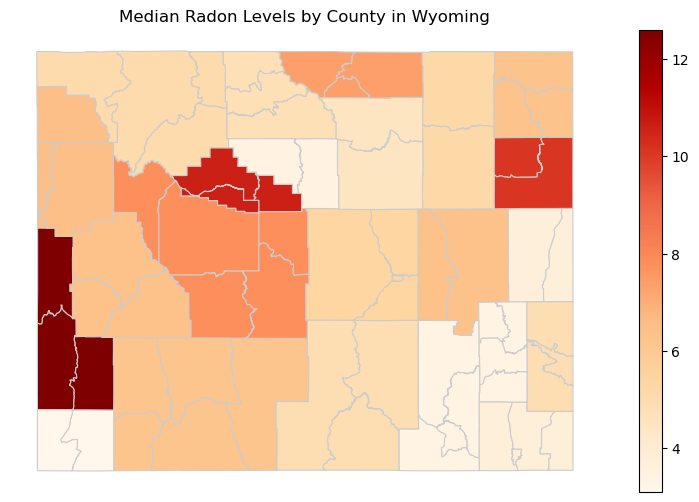

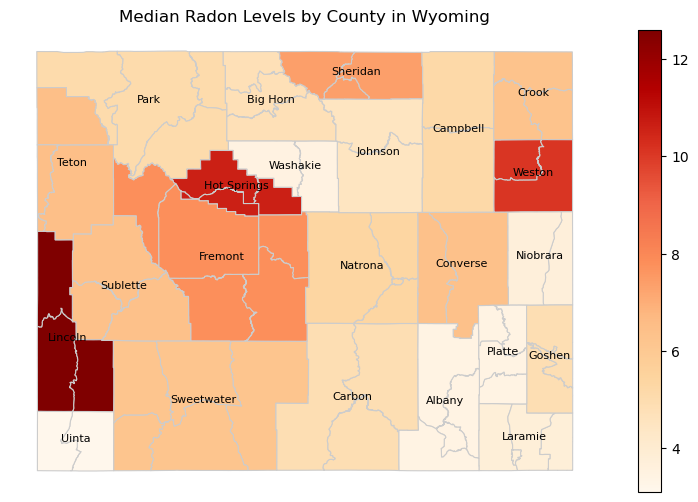

In [9]:
#Wyoming
#WY regions
df_WY["CountyFIPS"] = df_WY["CountyFIPS"].astype(str).str.zfill(5)

gdf_regions_WY["COUNTYFP"] = gdf_regions_WY["COUNTYFP"].astype(str).str.zfill(3)
gdf_regions_WY["STATEFP"] = gdf_regions_WY["STATEFP"].astype(str).str.zfill(2)
gdf_regions_WY["CountyFIPS"] = gdf_regions_WY["STATEFP"] + gdf_regions_WY["COUNTYFP"]

#Merge datasets
merged_gdf_WY = gdf_regions_WY.merge(df_WY, on="CountyFIPS", how="left")

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf_WY.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Median Radon Levels by County in Wyoming')
ax.set_axis_off()

plt.show()

# Plot the choropleth map with Counties
merged_gdf_WY = merged_gdf_WY.to_crs(epsg=3857)

# Compute centroids and retain as a GeoDataFrame
county_centroids = merged_gdf_WY.dissolve(by='County').centroid
county_centroids = county_centroids.to_frame(name='geometry')  
county_centroids['County'] = county_centroids.index  

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf_WY.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add county names at centroid positions
for idx, row in county_centroids.iterrows():
    ax.annotate(text=row['County'], xy=(row.geometry.x, row.geometry.y), 
                xytext=(0, 0), textcoords="offset points", fontsize=8,
                ha='center', color='black')

# Customize the plot
ax.set_title('Median Radon Levels by County in Wyoming')
ax.set_axis_off()

plt.show()

<font color = grey>*Wyoming is showing high levels of radon across the entire state except the SE corner of the state.*<font>

<div style="text-align: center;">
  <h1 style="color: olive;">Utah Radon Levels</h1>
</div>

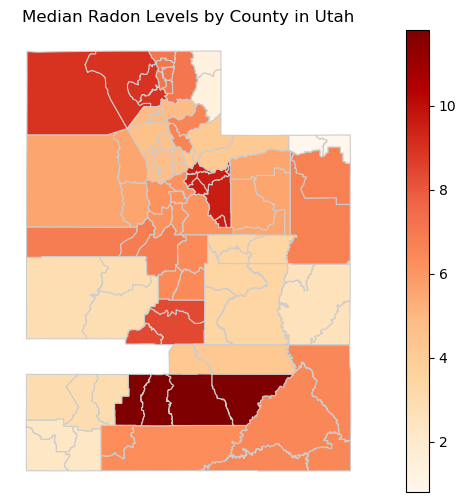

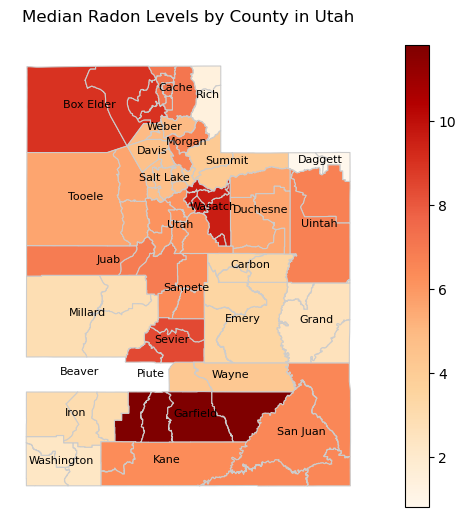

In [10]:
#Utah
#UT regions
df_UT["CountyFIPS"] = df_UT["CountyFIPS"].astype(str).str.zfill(5)

gdf_regions_UT["COUNTYFP"] = gdf_regions_UT["COUNTYFP"].astype(str).str.zfill(3)
gdf_regions_UT["STATEFP"] = gdf_regions_UT["STATEFP"].astype(str).str.zfill(2)
gdf_regions_UT["CountyFIPS"] = gdf_regions_UT["STATEFP"] + gdf_regions_UT["COUNTYFP"]

#Merge datasets
merged_gdf_UT = gdf_regions_UT.merge(df_UT, on="CountyFIPS", how="left")

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf_UT.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Median Radon Levels by County in Utah')
ax.set_axis_off()

plt.show()

# Plot the choropleth map with Counties
merged_gdf_UT = merged_gdf_UT.to_crs(epsg=3857)

# Compute centroids and retain as a GeoDataFrame
county_centroids = merged_gdf_UT.dissolve(by='County').centroid
county_centroids = county_centroids.to_frame(name='geometry')  
county_centroids['County'] = county_centroids.index  

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf_UT.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add county names at centroid positions
for idx, row in county_centroids.iterrows():
    ax.annotate(text=row['County'], xy=(row.geometry.x, row.geometry.y), 
                xytext=(0, 0), textcoords="offset points", fontsize=8,
                ha='center', color='black')

# Customize the plot
ax.set_title('Median Radon Levels by County in Utah')
ax.set_axis_off()

plt.show()

<font color = grey>*Utah is showing extreme levels in the NE corner and SE corner of the state.*<font>

<div style="text-align: center;">
  <h1 style="color: olive;">Arizona Radon Levels</h1>
</div>

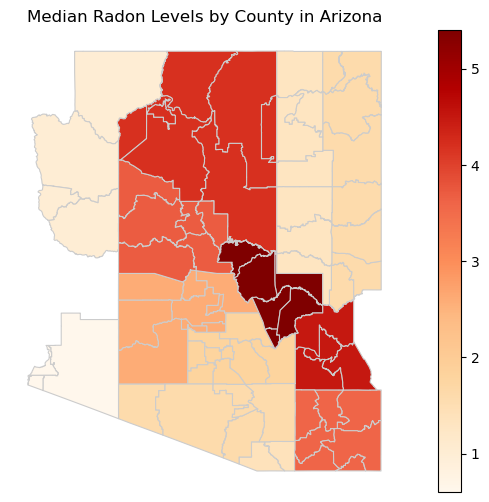

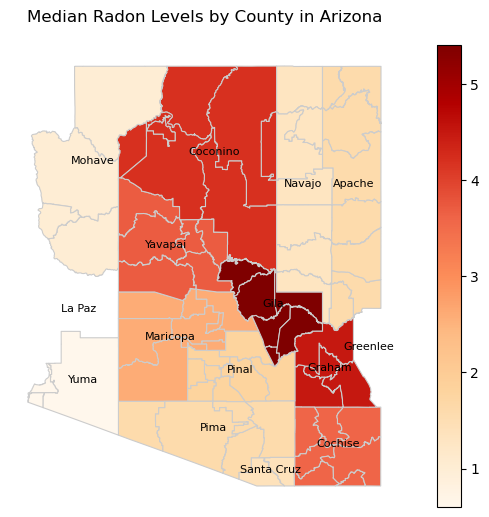

In [42]:
#Arizona
#AZ regions
df_AZ["CountyFIPS"] = df_AZ["CountyFIPS"].astype(str).str.zfill(5)

gdf_regions_AZ["COUNTYFP"] = gdf_regions_AZ["COUNTYFP"].astype(str).str.zfill(3)
gdf_regions_AZ["STATEFP"] = gdf_regions_AZ["STATEFP"].astype(str).str.zfill(2)
gdf_regions_AZ["CountyFIPS"] = gdf_regions_AZ["STATEFP"] + gdf_regions_AZ["COUNTYFP"]

#Merge datasets
merged_gdf_AZ = gdf_regions_AZ.merge(df_AZ, on="CountyFIPS", how="left")

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf_AZ.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Median Radon Levels by County in Arizona')
ax.set_axis_off()

plt.show()


# Plot the choropleth map with Counties
merged_gdf_AZ = merged_gdf_AZ.to_crs(epsg=3857)

# Compute centroids and retain as a GeoDataFrame
county_centroids = merged_gdf_AZ.dissolve(by='County').centroid
county_centroids = county_centroids.to_frame(name='geometry')  
county_centroids['County'] = county_centroids.index  

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf_AZ.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add county names at centroid positions
for idx, row in county_centroids.iterrows():
    ax.annotate(text=row['County'], xy=(row.geometry.x, row.geometry.y), 
                xytext=(0, 0), textcoords="offset points", fontsize=8,
                ha='center', color='black')

# Customize the plot
ax.set_title('Median Radon Levels by County in Arizona')
ax.set_axis_off()

plt.show()

<font color = grey>*Arizona is showing high levels of radon N and SE corner of the state.*<font>

<font color = grey>*Visually, it is difficult to identify a clear pattern in radon distribution. Extremely high radon levels appear somewhat sporadically, rather than being concentrated in a specific region of Colorado or the surrounding states. Instead, elevated levels are scattered across various locations in different states.*<font>

<font color = darkgreen>*Research Q2: Where is radon the highest (North, East, South, or West)?*<font>

<font color = grey>*(Displaying bar plots for Colorado and its surrounding states to visually identify where radon levels are highest.)*<font>

<div style="text-align: center;">
  <h1 style="color: olive;">Median Radon Levels</h1>
</div>

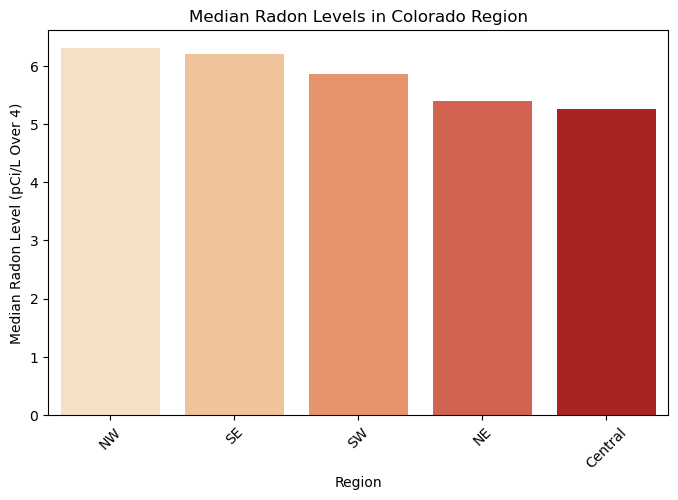

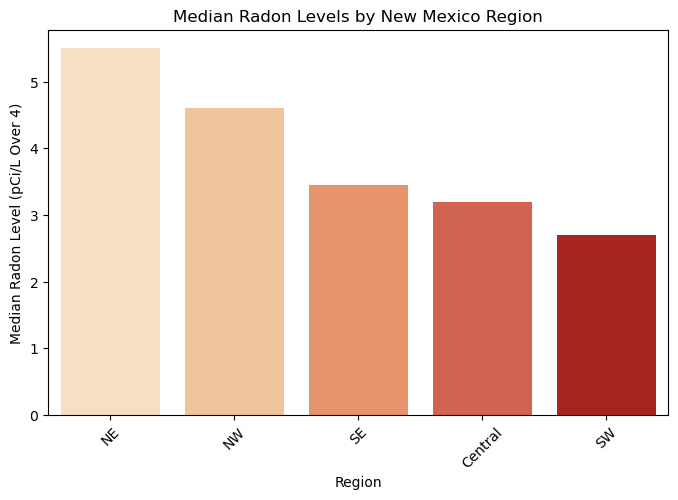

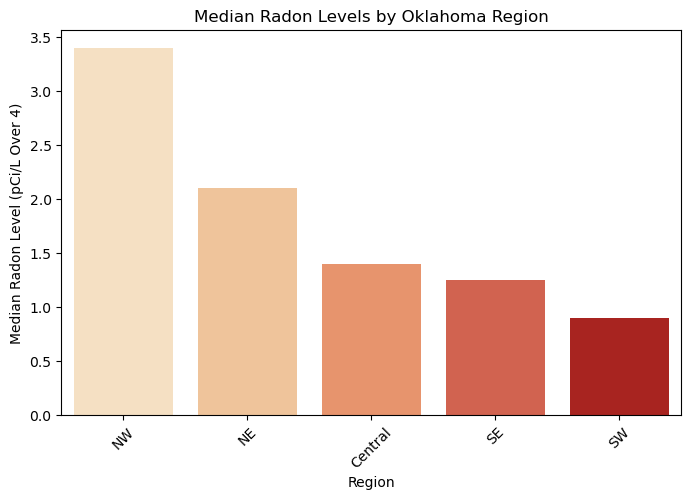

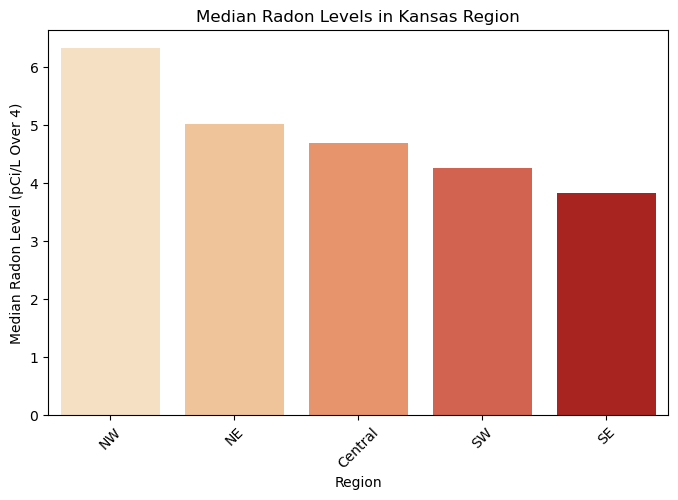

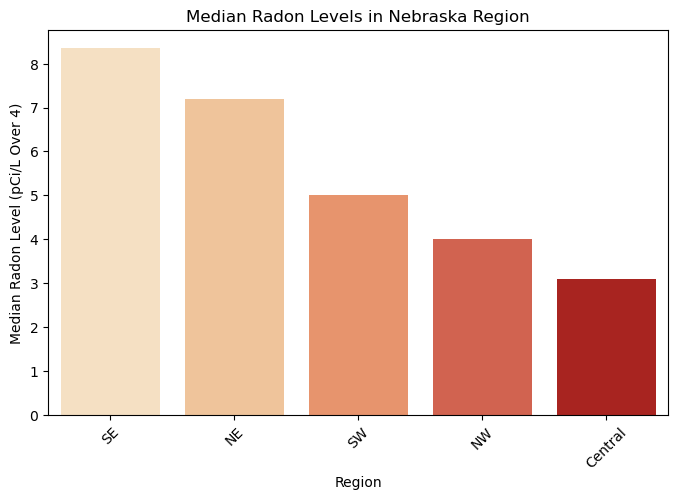

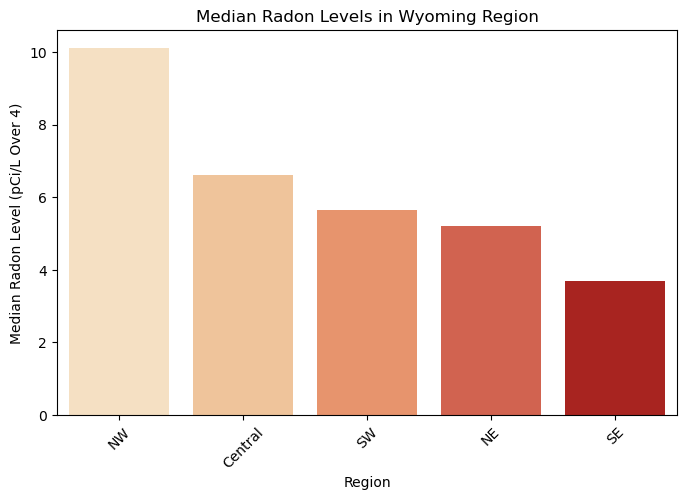

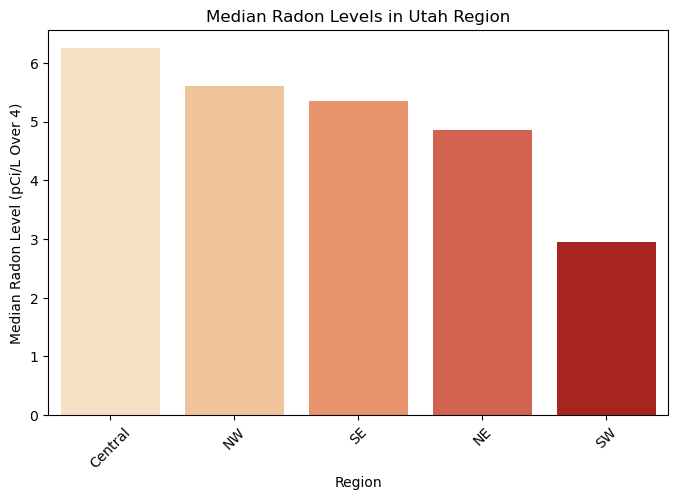

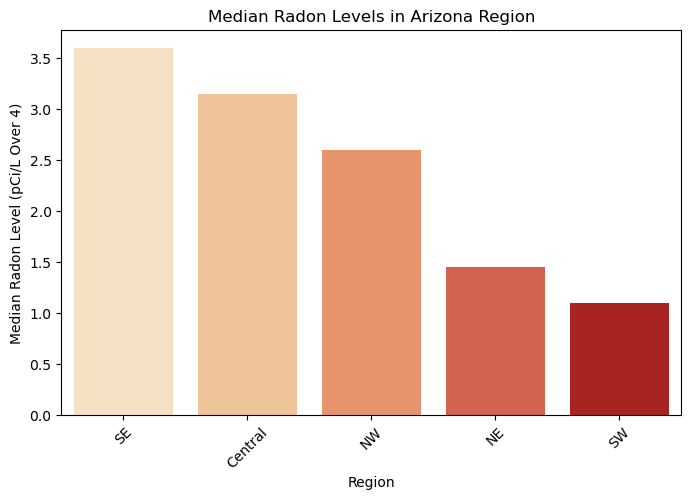

In [12]:
#show median radon levels by Colorado region
region_median_CO = df_CO.groupby("Region")["Value"].median().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(x=region_median_CO.index, y=region_median_CO.values, hue = region_median_CO.index, palette="OrRd", legend=False)

# Customize the plot
plt.title("Median Radon Levels in Colorado Region")
plt.xlabel("Region")
plt.ylabel("Median Radon Level (pCi/L Over 4)")
plt.xticks(rotation=45) 
plt.show()

#show median radon levels by New Mexico region
region_median_NM = df_NM.groupby("Region")["Value"].median().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(x=region_median_NM.index, y=region_median_NM.values, hue = region_median_NM.index, palette="OrRd", legend=False)

# Customize the plot
plt.title("Median Radon Levels by New Mexico Region")
plt.xlabel("Region")
plt.ylabel("Median Radon Level (pCi/L Over 4)")
plt.xticks(rotation=45) 
plt.show()

#show median radon levels by Oklahoma region
df_OK["Value"] = pd.to_numeric(df_OK["Value"], errors='coerce')
region_median_OK = df_OK.groupby("Region")["Value"].median().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(x=region_median_OK.index, y=region_median_OK.values, hue = region_median_OK.index, palette="OrRd", legend=False)

# Customize the plot
plt.title("Median Radon Levels by Oklahoma Region")
plt.xlabel("Region")
plt.ylabel("Median Radon Level (pCi/L Over 4)")
plt.xticks(rotation=45) 
plt.show()

#show median radon levels by Kansas region
region_median_KS = df_KS.groupby("Region")["Value"].median().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(x=region_median_KS.index, y=region_median_KS.values, hue = region_median_KS.index, palette="OrRd", legend=False)

# Customize the plot
plt.title("Median Radon Levels in Kansas Region")
plt.xlabel("Region")
plt.ylabel("Median Radon Level (pCi/L Over 4)")
plt.xticks(rotation=45) 
plt.show()

#show median radon levels by Nebraska region
region_median_NE = df_NE.groupby("Region")["Value"].median().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(x=region_median_NE.index, y=region_median_NE.values, hue = region_median_NE.index, palette="OrRd", legend=False)

# Customize the plot
plt.title("Median Radon Levels in Nebraska Region")
plt.xlabel("Region")
plt.ylabel("Median Radon Level (pCi/L Over 4)")
plt.xticks(rotation=45) 
plt.show()

#show median radon levels by Wyoming region
region_median_WY = df_WY.groupby("Region")["Value"].median().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(x=region_median_WY.index, y=region_median_WY.values, hue = region_median_WY.index, palette="OrRd", legend=False)

# Customize the plot
plt.title("Median Radon Levels in Wyoming Region")
plt.xlabel("Region")
plt.ylabel("Median Radon Level (pCi/L Over 4)")
plt.xticks(rotation=45) 
plt.show()

#show median radon levels by Utah region
region_median_UT = df_UT.groupby("Region")["Value"].median().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(x=region_median_UT.index, y=region_median_UT.values, hue = region_median_UT.index, palette="OrRd", legend=False)

# Customize the plot
plt.title("Median Radon Levels in Utah Region")
plt.xlabel("Region")
plt.ylabel("Median Radon Level (pCi/L Over 4)")
plt.xticks(rotation=45) 
plt.show()

#show median radon levels by Arizona region
region_median_AZ = df_AZ.groupby("Region")["Value"].median().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(x=region_median_AZ.index, y=region_median_AZ.values, hue = region_median_AZ.index, palette="OrRd", legend=False)

# Customize the plot
plt.title("Median Radon Levels in Arizona Region")
plt.xlabel("Region")
plt.ylabel("Median Radon Level (pCi/L Over 4)")
plt.xticks(rotation=45) 
plt.show()

<font color = grey>*Across Colorado and its surrounding states, radon levels vary significantly by region. In Colorado, the highest levels are concentrated in the northwest, while the central region shows the lowest levels. New Mexico follows a somewhat opposite pattern, with the highest levels in the northeast and the lowest in the southwest. Oklahoma and Kansas both have elevated radon levels in the northwest, with their lowest levels in the southwest and southeast, respectively. Nebraska displays its highest radon levels in the southeast, while central areas have the lowest. Wyoming shows a similar trend to Nebraska, with the highest levels in the northeast and the lowest in the southeast. In Utah, central regions exhibit the highest radon levels, whereas the southwest reports the lowest. Finally, Arizona shows the highest median radon levels in the southeast and the lowest in the southwest. Overall, there is no single regional trend across all states—radon levels are highly variable, depending on local geography and geology.*<font>

<div style="text-align: center;">
  <h1 style="color: olive;">This Visualization Displays the Distribution of Radon Levels Across Colorado and its Surrounding States, Helping Identify Regional Patterns.</h1>
</div>

<font color = darkgreen>*Research Q3: Is there a correlation of radon levels across different regions?*<font>

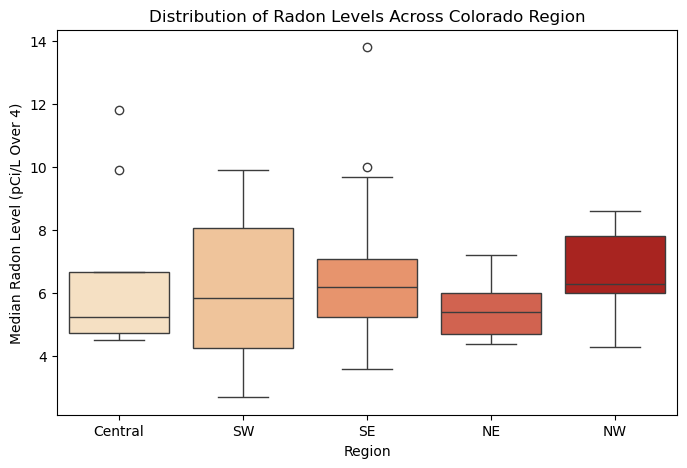

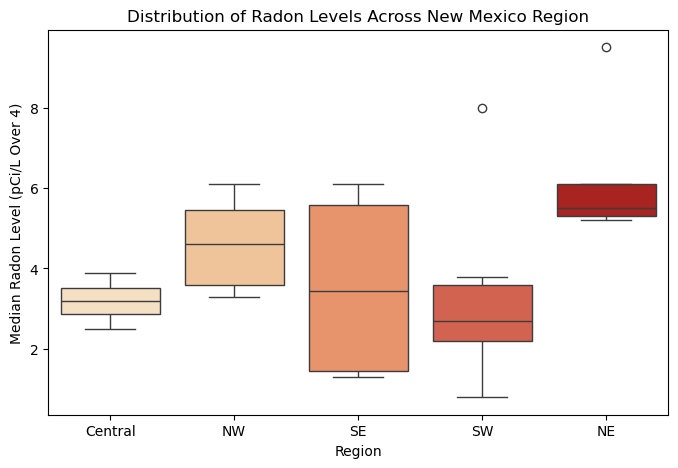

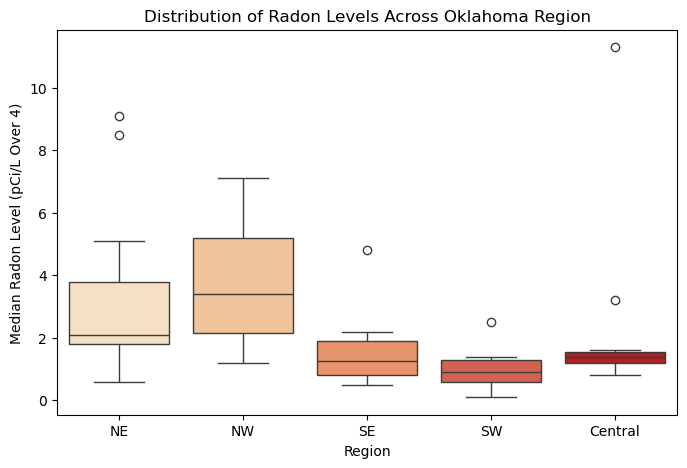

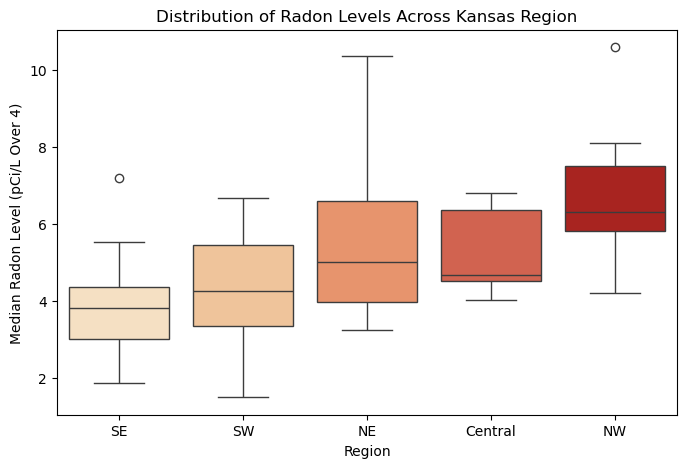

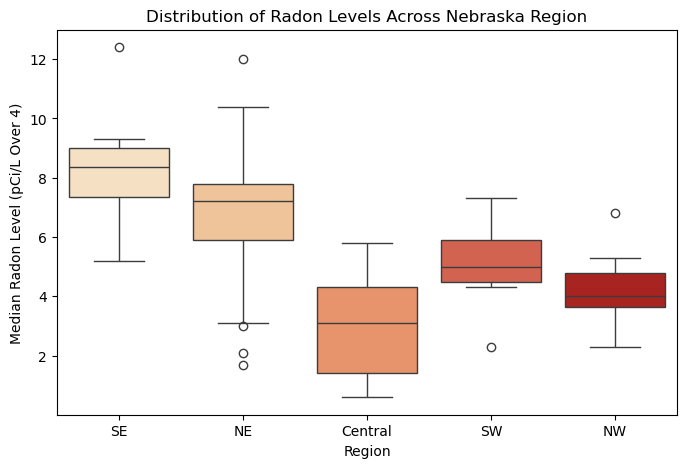

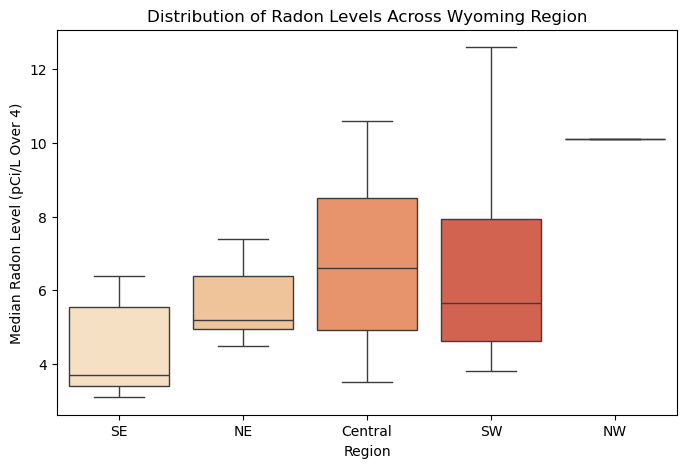

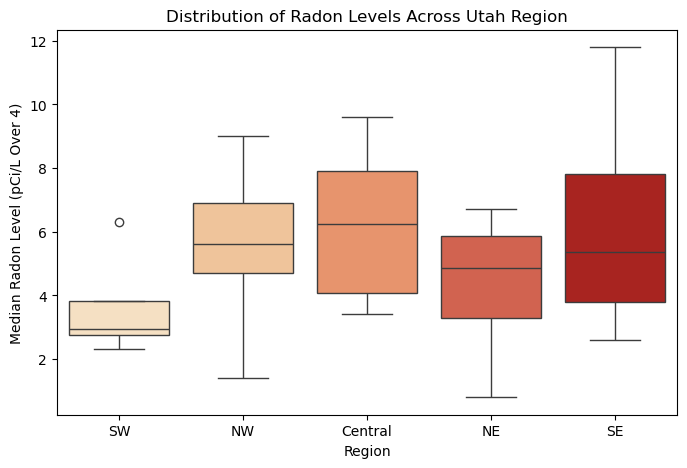

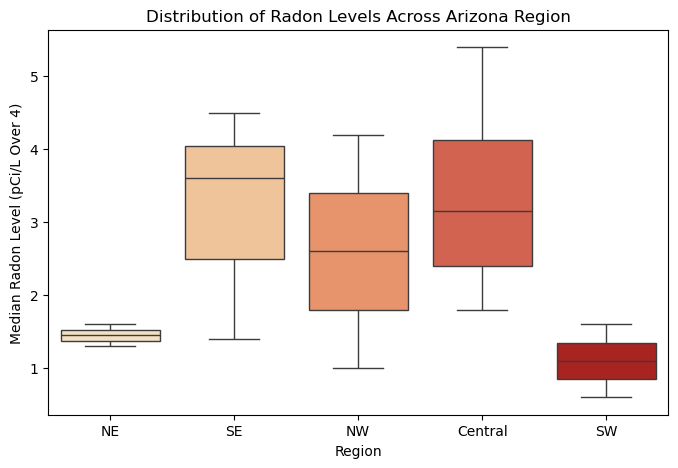

In [13]:
# Research Question 3: Is there a correlation of radon levels across different regions?
#Colorado
plt.figure(figsize=(8, 5))
sns.boxplot(x="Region", y="Value", data=df_CO, hue= "Region", palette="OrRd", legend = False)
plt.title("Distribution of Radon Levels Across Colorado Region")
plt.xlabel("Region")
plt.ylabel("Median Radon Level (pCi/L Over 4)")
plt.show()

# New Mexico
plt.figure(figsize=(8, 5))
sns.boxplot(x="Region", y="Value", data=df_NM, hue= "Region", palette="OrRd", legend = False)
plt.title("Distribution of Radon Levels Across New Mexico Region")
plt.xlabel("Region")
plt.ylabel("Median Radon Level (pCi/L Over 4)")
plt.show()

# Oklahoma
plt.figure(figsize=(8, 5))
sns.boxplot(x="Region", y="Value", data=df_OK, hue= "Region", palette="OrRd", legend = False)
plt.title("Distribution of Radon Levels Across Oklahoma Region")
plt.xlabel("Region")
plt.ylabel("Median Radon Level (pCi/L Over 4)")
plt.show()

# Kansas
plt.figure(figsize=(8, 5))
sns.boxplot(x="Region", y="Value", data=df_KS, hue= "Region", palette="OrRd", legend = False)
plt.title("Distribution of Radon Levels Across Kansas Region")
plt.xlabel("Region")
plt.ylabel("Median Radon Level (pCi/L Over 4)")
plt.show()

# Nebraska
plt.figure(figsize=(8, 5))
sns.boxplot(x="Region", y="Value", data=df_NE, hue= "Region", palette="OrRd", legend = False)
plt.title("Distribution of Radon Levels Across Nebraska Region")
plt.xlabel("Region")
plt.ylabel("Median Radon Level (pCi/L Over 4)")
plt.show()

# Wyoming
plt.figure(figsize=(8, 5))
sns.boxplot(x="Region", y="Value", data=df_WY, hue= "Region", palette="OrRd", legend = False)
plt.title("Distribution of Radon Levels Across Wyoming Region")
plt.xlabel("Region")
plt.ylabel("Median Radon Level (pCi/L Over 4)")
plt.show()

# Utah
plt.figure(figsize=(8, 5))
sns.boxplot(x="Region", y="Value", data=df_UT, hue= "Region", palette="OrRd", legend = False)
plt.title("Distribution of Radon Levels Across Utah Region")
plt.xlabel("Region")
plt.ylabel("Median Radon Level (pCi/L Over 4)")
plt.show()

# Arizona
plt.figure(figsize=(8, 5))
sns.boxplot(x="Region", y="Value", data=df_AZ, hue= "Region", palette="OrRd", legend = False)
plt.title("Distribution of Radon Levels Across Arizona Region")
plt.xlabel("Region")
plt.ylabel("Median Radon Level (pCi/L Over 4)")
plt.show()

<font color = grey>*In Colorado, the southwestern region exhibits higher median radon levels, while the central part shows comparatively lower medians. However, all regions across the state report median levels above 4 pCi/L, which is considered a concerning threshold.
In New Mexico, the northeastern and northwestern regions have median radon levels exceeding 4 pCi/L. In contrast, the central, southeastern, and southwestern areas show median levels below the 4 pCi/L guideline.
Oklahoma displays relatively low radon levels, with all regions reporting median values below 4 pCi/L.
In Kansas, the southwestern, northeastern, central, and northwestern regions show medians above 4 pCi/L, while the southeastern region remains below that level.
Nebraska has elevated medians (above 4 pCi/L) in the southeastern, northeastern, southwestern, and northwestern areas, with only the central region falling below the threshold.
In Wyoming, the northeastern, central, southwestern, and northwestern regions all exceed 4 pCi/L in median radon levels, whereas the southeastern region is below the concerning threshold.
Utah reports higher median levels (above 4 pCi/L) in the northwestern, central, northeastern, and southeastern areas, while the southwestern region shows levels below 4 pCi/L.
Finally, Arizona consistently reports median radon levels below 4 pCi/L across all regions.*<font>

<div style="text-align: center;">
  <h1 style="color: olive;">Colorado Surrounding Counties & States Radon Levels</h1>
</div>

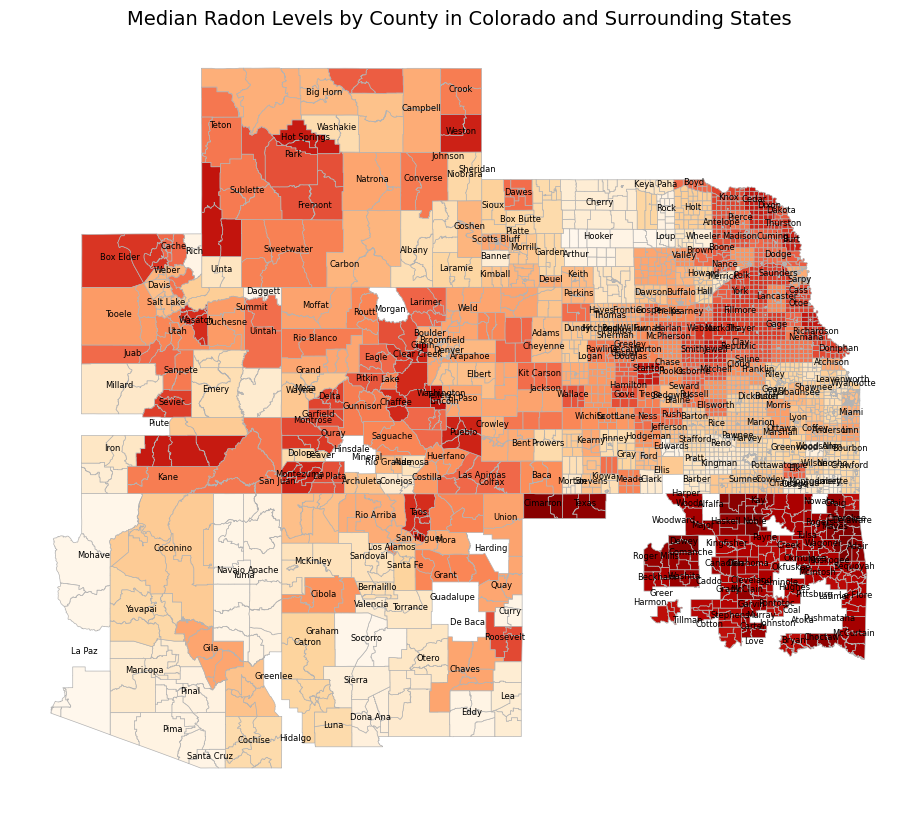

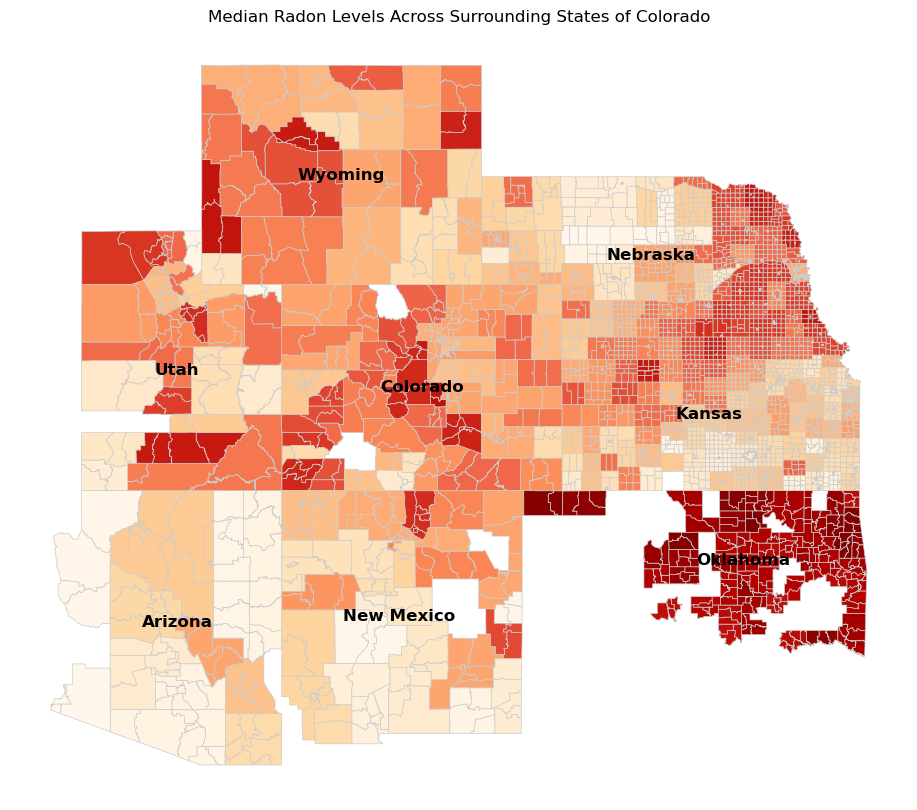

In [18]:
for gdf in [merged_gdf_AZ, merged_gdf_NM, merged_gdf_OK, merged_gdf_KS, merged_gdf_NE, merged_gdf_WY, merged_gdf_UT]:
    gdf.to_crs(epsg=3857, inplace=True)

all_states_gdf = pd.concat([
    merged_gdf_AZ,
    merged_gdf_NM,
    merged_gdf_OK,
    merged_gdf_KS,
    merged_gdf_NE,
    merged_gdf_WY,
    merged_gdf_UT,
    merged_gdf_CO  
])

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

all_states_gdf.plot(column='Value', cmap='OrRd', linewidth=0.5, ax=ax, edgecolor='0.7', legend=False)

ax.set_title('Median Radon Levels by County in Colorado and Surrounding States', fontsize=14)
ax.set_axis_off()

centroids = all_states_gdf.dissolve(by='County').centroid
centroids = centroids.to_frame(name='geometry')
centroids['County'] = centroids.index

for idx, row in centroids.iterrows():
    ax.annotate(text=row['County'], xy=(row.geometry.x, row.geometry.y), 
                xytext=(0, 0), textcoords="offset points", fontsize=6, ha='center')

# Combine all states into one GeoDataFrame
all_states_gdf = pd.concat([
    merged_gdf_CO.assign(State='Colorado'),
    merged_gdf_AZ.assign(State='Arizona'),
    merged_gdf_NM.assign(State='New Mexico'),
    merged_gdf_OK.assign(State='Oklahoma'),
    merged_gdf_KS.assign(State='Kansas'),
    merged_gdf_NE.assign(State='Nebraska'),
    merged_gdf_WY.assign(State='Wyoming'),
    merged_gdf_UT.assign(State='Utah')
])

# Dissolve counties to get one polygon per state
states_dissolved = all_states_gdf.dissolve(by='State')

states_dissolved = states_dissolved.to_crs(epsg=3857)

# Compute centroids
state_centroids = states_dissolved.centroid

# Plot choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
all_states_gdf.plot(column='Value', cmap='OrRd', linewidth=0.5, ax=ax, edgecolor='0.8', legend=False)

# Add state labels at centroids
for state, point in state_centroids.items():
    ax.annotate(text=state, xy=(point.x, point.y), fontsize=12,
                ha='center', va='center', color='black', weight='bold')

ax.set_title('Median Radon Levels Across Surrounding States of Colorado')
ax.set_axis_off()
plt.show()

<font color = grey>*Overall, the northern areas across these states show a trend of elevated median radon levels, while the southern regions generally exhibit lower concentrations.*<font>

In [19]:
#Uranium found in Colorado Water
water_CO = pd.read_csv("C:\\Users\\Owner\\Desktop\\Spring_2025\\DSCI235\\HW\\Project\\water\\uranium_CO.csv")

#Uranium found in New Mexico Water
water_NM = pd.read_csv("C:\\Users\\Owner\\Desktop\\Spring_2025\\DSCI235\\HW\\Project\\water\\uranium_NM.csv")

#Uranium found in Kansas Water
water_KS = pd.read_csv("C:\\Users\\Owner\\Desktop\\Spring_2025\\DSCI235\\HW\\Project\\water\\uranium_KS.csv")

#Uranium found in Nebraska Water
water_NE = pd.read_csv("C:\\Users\\Owner\\Desktop\\Spring_2025\\DSCI235\\HW\\Project\\water\\uranium_NE.csv")

#Uranium found in Utah Water
water_UT = pd.read_csv("C:\\Users\\Owner\\Desktop\\Spring_2025\\DSCI235\\HW\\Project\\water\\uranium_UT.csv")

#Uranium found in Arizona Water
water_AZ = pd.read_csv("C:\\Users\\Owner\\Desktop\\Spring_2025\\DSCI235\\HW\\Project\\water\\uranium_AZ.csv")

<div style="text-align: center;">
  <h1 style="color: lightpink;">Colorado Uranium Levels</h1>
</div>

<font color = darkgreen>*Research Q4: Is there a correlation between radon levels and uranium found in water?*<font>

<font color = black>*(Displaying Colorado and its surrounding states—first individually, then together—to visually examine how uranium is distributed across counties in each state.)*<font>

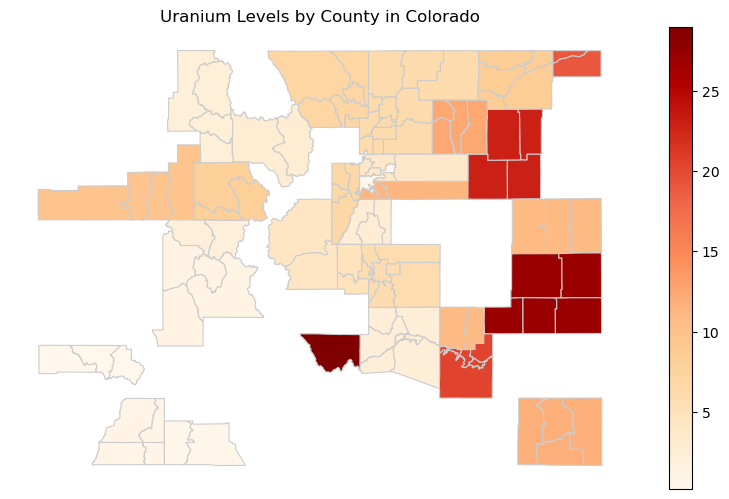

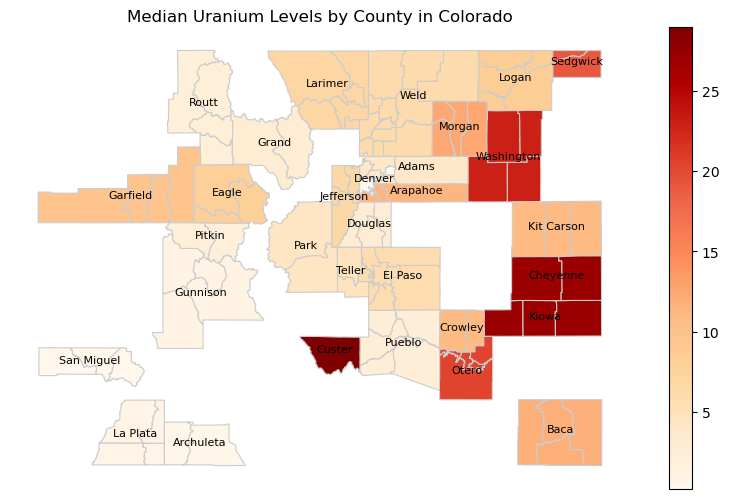

In [29]:
#Colorado
#CO water
water_CO["CountyFIPS"] = water_CO["CountyFIPS"].astype(str).str.zfill(5)

gdf_regions_CO["COUNTYFP"] = gdf_regions_CO["COUNTYFP"].astype(str).str.zfill(3)
gdf_regions_CO["STATEFP"] = gdf_regions_CO["STATEFP"].astype(str).str.zfill(2)
gdf_regions_CO["CountyFIPS"] = gdf_regions_CO["STATEFP"] + gdf_regions_CO["COUNTYFP"]

#Merge datasets
merged_water_CO = gdf_regions_CO.merge(water_CO, on="CountyFIPS", how="left")

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_water_CO.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Uranium Levels by County in Colorado')
ax.set_axis_off()

plt.show()

# Plot the choropleth map with Counties
merged_water_CO = merged_water_CO.to_crs(epsg=3857)

# Compute centroids and retain as a GeoDataFrame
county_centroids = merged_water_CO.dissolve(by='County').centroid
county_centroids = county_centroids.to_frame(name='geometry')  
county_centroids['County'] = county_centroids.index  

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_water_CO.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add county names at centroid positions
for idx, row in county_centroids.iterrows():
    ax.annotate(text=row['County'], xy=(row.geometry.x, row.geometry.y), 
                xytext=(0, 0), textcoords="offset points", fontsize=8,
                ha='center', color='black')

# Customize the plot
ax.set_title('Median Uranium Levels by County in Colorado')
ax.set_axis_off()

plt.show()

<font color = grey>*The data for Colorado indicate elevated uranium concentrations in the eastern region of the state, with levels surpassing 30 micrograms per liter (µg/L).*<font>

<div style="text-align: center;">
  <h1 style="color: lightpink;">New Mexico Uranium Levels</h1>
</div>

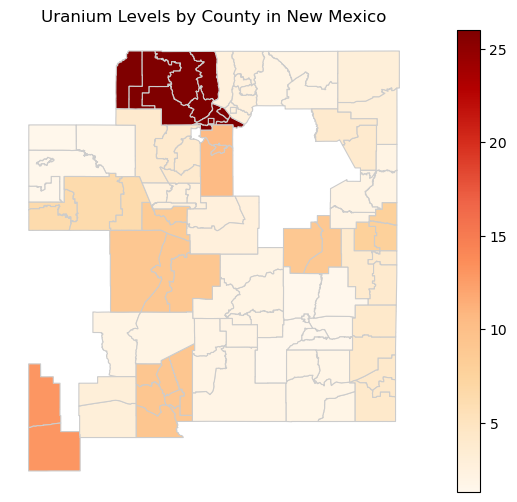

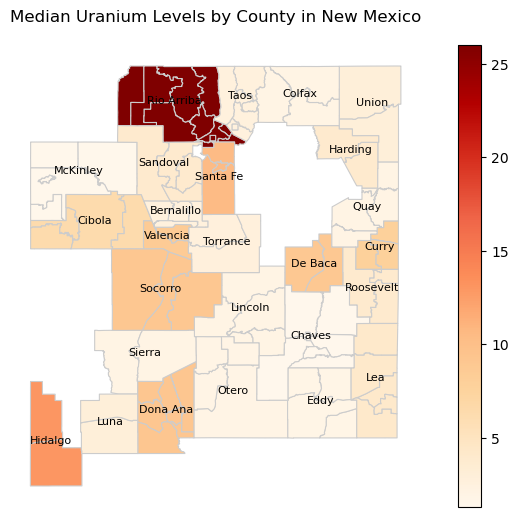

In [30]:
#New Mexico
#NM water
water_NM["CountyFIPS"] = water_NM["CountyFIPS"].astype(str).str.zfill(5)

gdf_regions_NM["COUNTYFP"] = gdf_regions_NM["COUNTYFP"].astype(str).str.zfill(3)
gdf_regions_NM["STATEFP"] = gdf_regions_NM["STATEFP"].astype(str).str.zfill(2)
gdf_regions_NM["CountyFIPS"] = gdf_regions_NM["STATEFP"] + gdf_regions_NM["COUNTYFP"]

#Merge datasets
merged_water_NM = gdf_regions_NM.merge(water_NM, on="CountyFIPS", how="left")

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_water_NM.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Uranium Levels by County in New Mexico')
ax.set_axis_off()

plt.show()

# Plot the choropleth map with Counties
merged_water_NM = merged_water_NM.to_crs(epsg=3857)

# Compute centroids and retain as a GeoDataFrame
county_centroids = merged_water_NM.dissolve(by='County').centroid
county_centroids = county_centroids.to_frame(name='geometry')  
county_centroids['County'] = county_centroids.index  

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_water_NM.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add county names at centroid positions
for idx, row in county_centroids.iterrows():
    ax.annotate(text=row['County'], xy=(row.geometry.x, row.geometry.y), 
                xytext=(0, 0), textcoords="offset points", fontsize=8,
                ha='center', color='black')

# Customize the plot
ax.set_title('Median Uranium Levels by County in New Mexico')
ax.set_axis_off()

plt.show()

<font color = grey>*The data for New Mexico indicate elevated uranium concentrations in the NW region of the state, with levels surpassing 30 micrograms per liter (µg/L).*<font>

<div style="text-align: center;">
  <h1 style="color: lightpink;">Kansas Uranium Levels</h1>
</div>

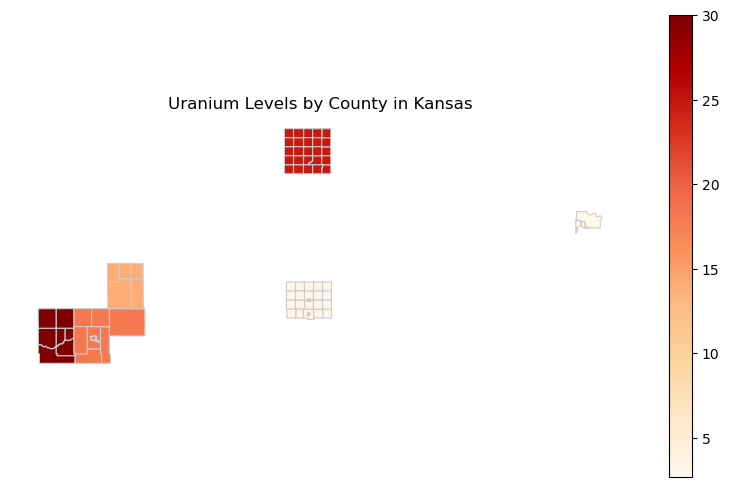

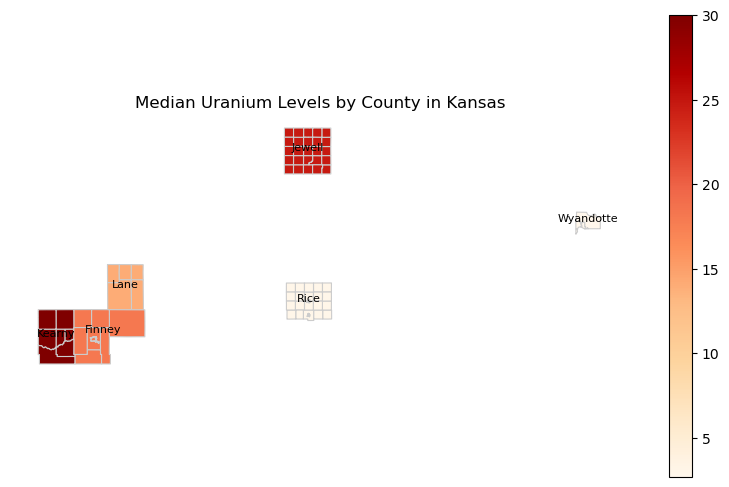

In [31]:
#Kansas
#KS water
water_KS["CountyFIPS"] = water_KS["CountyFIPS"].astype(str).str.zfill(5)

gdf_regions_KS["COUNTYFP"] = gdf_regions_KS["COUNTYFP"].astype(str).str.zfill(3)
gdf_regions_KS["STATEFP"] = gdf_regions_KS["STATEFP"].astype(str).str.zfill(2)
gdf_regions_KS["CountyFIPS"] = gdf_regions_KS["STATEFP"] + gdf_regions_KS["COUNTYFP"]

#Merge datasets
merged_water_KS = gdf_regions_KS.merge(water_KS, on="CountyFIPS", how="left")

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_water_KS.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Uranium Levels by County in Kansas')
ax.set_axis_off()

plt.show()

# Plot the choropleth map with Counties
merged_water_KS = merged_water_KS.to_crs(epsg=3857)

# Compute centroids and retain as a GeoDataFrame
county_centroids = merged_water_KS.dissolve(by='County').centroid
county_centroids = county_centroids.to_frame(name='geometry')  
county_centroids['County'] = county_centroids.index  

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_water_KS.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add county names at centroid positions
for idx, row in county_centroids.iterrows():
    ax.annotate(text=row['County'], xy=(row.geometry.x, row.geometry.y), 
                xytext=(0, 0), textcoords="offset points", fontsize=8,
                ha='center', color='black')

# Customize the plot
ax.set_title('Median Uranium Levels by County in Kansas')
ax.set_axis_off()

plt.show()

<font color = grey>*The data for Kansas indicate elevated uranium concentrations in the north and SE region of the state, with levels surpassing 30 micrograms per liter (µg/L).*<font>

<div style="text-align: center;">
  <h1 style="color: lightpink;">Utah Uranium Levels</h1>
</div>

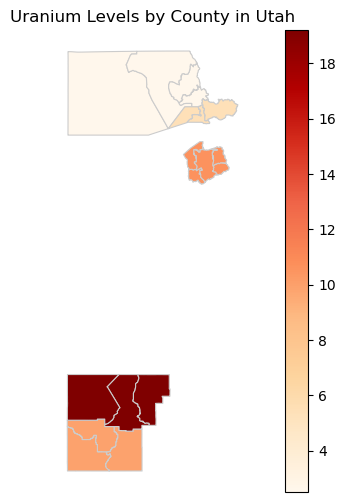

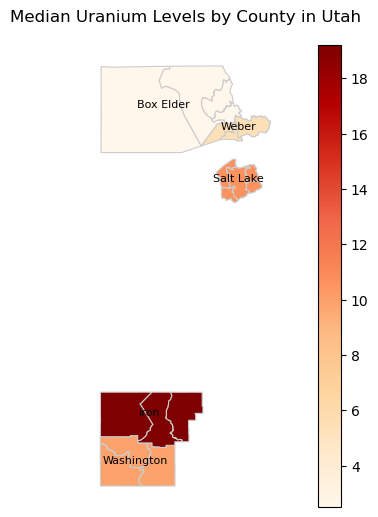

In [32]:
#Utah
#UT water
water_UT["CountyFIPS"] = water_UT["CountyFIPS"].astype(str).str.zfill(5)

gdf_regions_UT["COUNTYFP"] = gdf_regions_UT["COUNTYFP"].astype(str).str.zfill(3)
gdf_regions_UT["STATEFP"] = gdf_regions_UT["STATEFP"].astype(str).str.zfill(2)
gdf_regions_UT["CountyFIPS"] = gdf_regions_UT["STATEFP"] + gdf_regions_UT["COUNTYFP"]

#Merge datasets
merged_water_UT = gdf_regions_UT.merge(water_UT, on="CountyFIPS", how="left")

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_water_UT.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Uranium Levels by County in Utah')
ax.set_axis_off()

plt.show()

# Plot the choropleth map with Counties
merged_water_UT = merged_water_UT.to_crs(epsg=3857)

# Compute centroids and retain as a GeoDataFrame
county_centroids = merged_water_UT.dissolve(by='County').centroid
county_centroids = county_centroids.to_frame(name='geometry')  
county_centroids['County'] = county_centroids.index  

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_water_UT.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add county names at centroid positions
for idx, row in county_centroids.iterrows():
    ax.annotate(text=row['County'], xy=(row.geometry.x, row.geometry.y), 
                xytext=(0, 0), textcoords="offset points", fontsize=8,
                ha='center', color='black')

# Customize the plot
ax.set_title('Median Uranium Levels by County in Utah')
ax.set_axis_off()

plt.show()

<font color = grey>*The data for Utah indicate normal uranium concentrations throughout the region of the state, with levels below 30 micrograms per liter (µg/L).*<font>

<div style="text-align: center;">
  <h1 style="color: lightpink;">Nebraska Uranium Levels</h1>
</div>

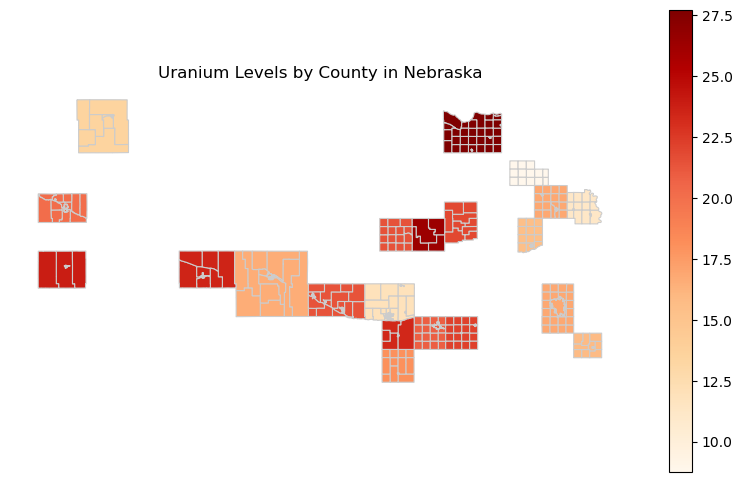

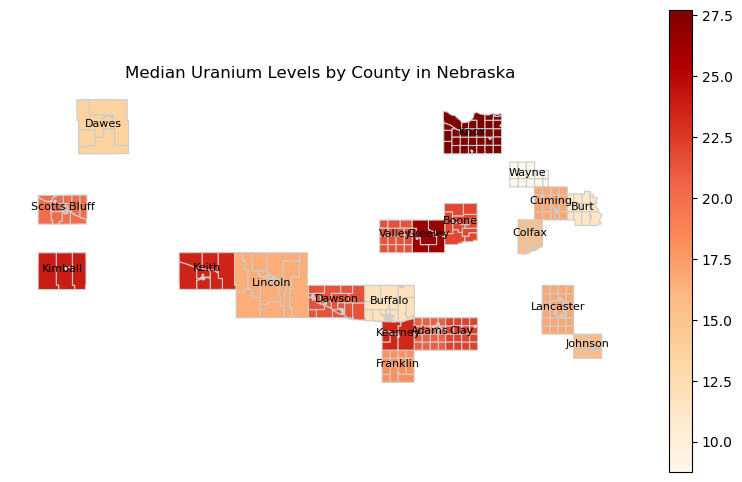

In [33]:
#Nebraska
#NE water
water_NE["CountyFIPS"] = water_NE["CountyFIPS"].astype(str).str.zfill(5)

gdf_regions_NE["COUNTYFP"] = gdf_regions_NE["COUNTYFP"].astype(str).str.zfill(3)
gdf_regions_NE["STATEFP"] = gdf_regions_NE["STATEFP"].astype(str).str.zfill(2)
gdf_regions_NE["CountyFIPS"] = gdf_regions_NE["STATEFP"] + gdf_regions_NE["COUNTYFP"]

#Merge datasets
merged_water_NE = gdf_regions_NE.merge(water_NE, on="CountyFIPS", how="left")

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_water_NE.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Uranium Levels by County in Nebraska')
ax.set_axis_off()

plt.show()

# Plot the choropleth map with Counties
merged_water_NE = merged_water_NE.to_crs(epsg=3857)

# Compute centroids and retain as a GeoDataFrame
county_centroids = merged_water_NE.dissolve(by='County').centroid
county_centroids = county_centroids.to_frame(name='geometry')  
county_centroids['County'] = county_centroids.index  

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_water_NE.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add county names at centroid positions
for idx, row in county_centroids.iterrows():
    ax.annotate(text=row['County'], xy=(row.geometry.x, row.geometry.y), 
                xytext=(0, 0), textcoords="offset points", fontsize=8,
                ha='center', color='black')

# Customize the plot
ax.set_title('Median Uranium Levels by County in Nebraska')
ax.set_axis_off()

plt.show()

<font color = grey>*The data for Nebraska indicate normal uranium concentrations throughout the region of the state, with levels below 30 micrograms per liter (µg/L).*<font>

<div style="text-align: center;">
  <h1 style="color: lightpink;">Arizona Uranium Levels</h1>
</div>

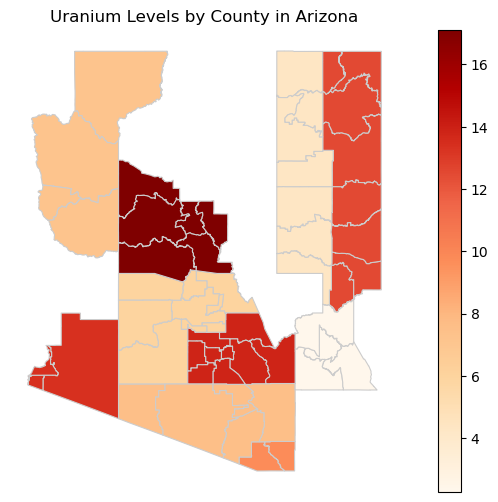

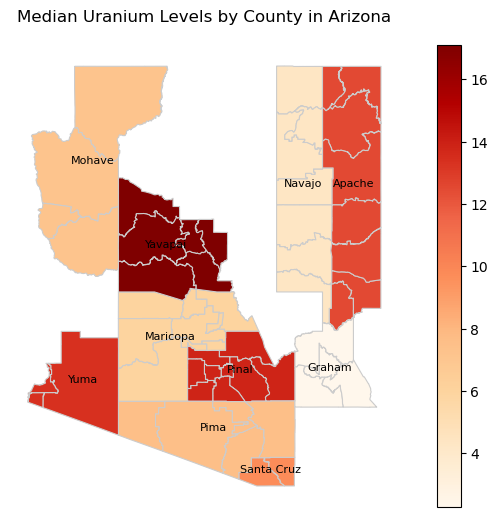

In [34]:
#Arizona
#AZ water
water_AZ["CountyFIPS"] = water_AZ["CountyFIPS"].astype(str).str.zfill(5)

gdf_regions_AZ["COUNTYFP"] = gdf_regions_AZ["COUNTYFP"].astype(str).str.zfill(3)
gdf_regions_AZ["STATEFP"] = gdf_regions_AZ["STATEFP"].astype(str).str.zfill(2)
gdf_regions_AZ["CountyFIPS"] = gdf_regions_AZ["STATEFP"] + gdf_regions_AZ["COUNTYFP"]

#Merge datasets
merged_water_AZ = gdf_regions_AZ.merge(water_AZ, on="CountyFIPS", how="left")

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_water_AZ.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Uranium Levels by County in Arizona')
ax.set_axis_off()

plt.show()

# Plot the choropleth map with Counties
merged_water_AZ = merged_water_AZ.to_crs(epsg=3857)

# Compute centroids and retain as a GeoDataFrame
county_centroids = merged_water_AZ.dissolve(by='County').centroid
county_centroids = county_centroids.to_frame(name='geometry')  
county_centroids['County'] = county_centroids.index  

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_water_AZ.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add county names at centroid positions
for idx, row in county_centroids.iterrows():
    ax.annotate(text=row['County'], xy=(row.geometry.x, row.geometry.y), 
                xytext=(0, 0), textcoords="offset points", fontsize=8,
                ha='center', color='black')

# Customize the plot
ax.set_title('Median Uranium Levels by County in Arizona')
ax.set_axis_off()

plt.show()

<font color = grey>*The data for Arizona indicate normal uranium concentrations throughout the region of the state, with levels below 30 micrograms per liter (µg/L).*<font>

<font color = grey>*Overall, the available data was not sufficient to definitively link specific regions to radon levels above 4 pCi/L. It's also important to note that not every state tests for uranium in their water, which limits the scope of the analysis.*<font>

<div style="text-align: center;">
  <h1 style="color: lightpink;">Median Uranium Levels</h1>
</div>

<font color = darkgreen>*Research Q5: Where is uranium the highest (North, East, South, or West)?*<font>

<font color = grey>*(Displaying bar plots for Colorado and its surrounding states to visually identify where uranium levels are highest.)*<font>

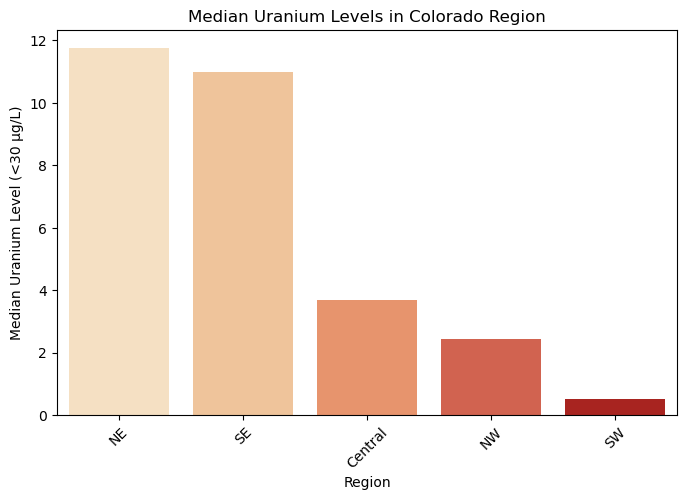

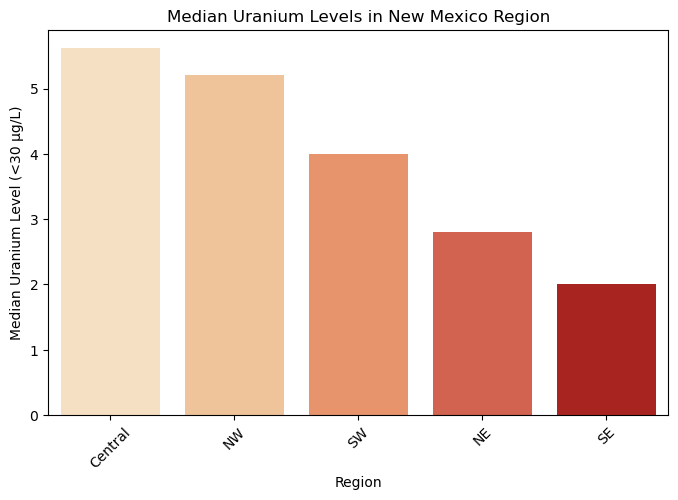

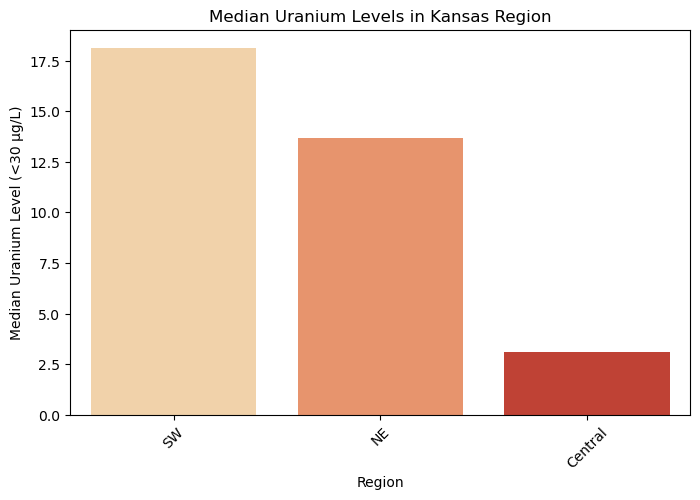

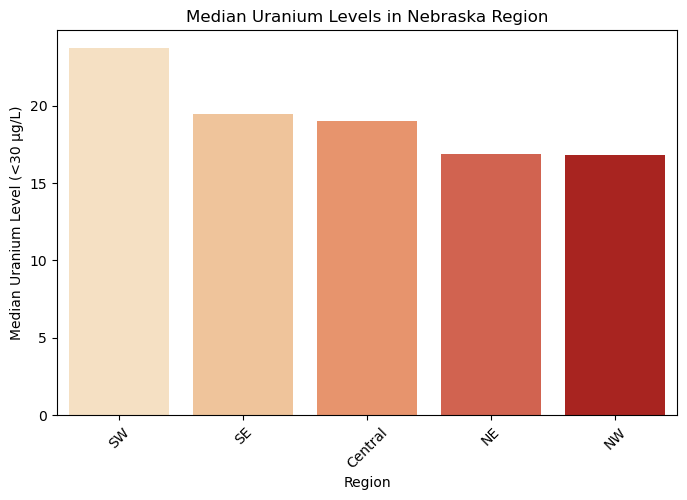

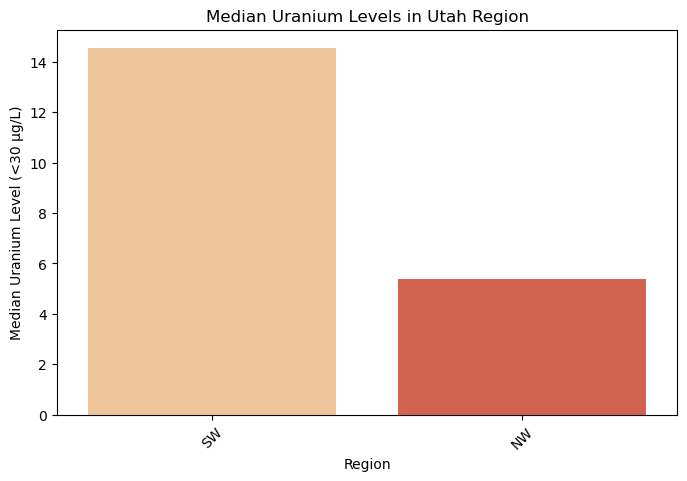

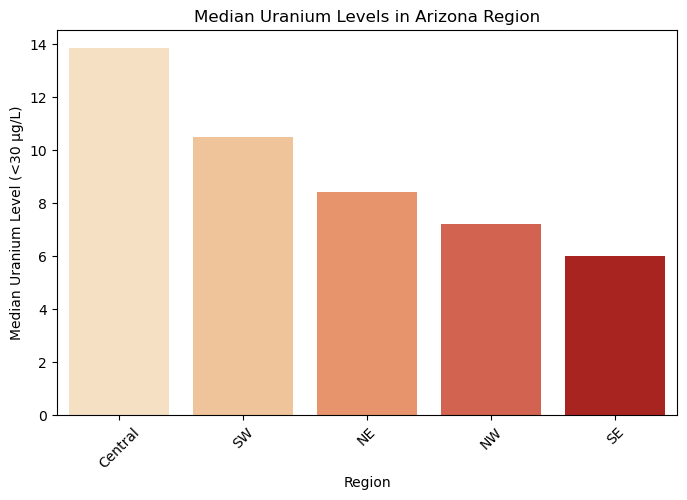

In [35]:
#show median radon levels by region
#Colorado
region_median_uranium_CO = water_CO.groupby("Region")["Value"].median().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(x=region_median_uranium_CO.index, y=region_median_uranium_CO.values, hue = region_median_uranium_CO.index, palette="OrRd", legend=False)

# Customize the plot
plt.title("Median Uranium Levels in Colorado Region")
plt.xlabel("Region")
plt.ylabel("Median Uranium Level (<30 \u00b5g/L)")
plt.xticks(rotation=45) 
plt.show()

#New Mexico
region_median_uranium_NM = water_NM.groupby("Region")["Value"].median().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(x=region_median_uranium_NM.index, y=region_median_uranium_NM.values, hue = region_median_uranium_NM.index, palette="OrRd", legend=False)

# Customize the plot
plt.title("Median Uranium Levels in New Mexico Region")
plt.xlabel("Region")
plt.ylabel("Median Uranium Level (<30 \u00b5g/L)")
plt.xticks(rotation=45) 
plt.show()

#Kansas
region_median_uranium_KS = water_KS.groupby("Region")["Value"].median().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(x=region_median_uranium_KS.index, y=region_median_uranium_KS.values, hue = region_median_uranium_KS.index, palette="OrRd", legend=False)

# Customize the plot
plt.title("Median Uranium Levels in Kansas Region")
plt.xlabel("Region")
plt.ylabel("Median Uranium Level (<30 \u00b5g/L)")
plt.xticks(rotation=45) 
plt.show()

#Nebraska
region_median_uranium_NE = water_NE.groupby("Region")["Value"].median().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(x=region_median_uranium_NE.index, y=region_median_uranium_NE.values, hue = region_median_uranium_NE.index, palette="OrRd", legend=False)

# Customize the plot
plt.title("Median Uranium Levels in Nebraska Region")
plt.xlabel("Region")
plt.ylabel("Median Uranium Level (<30 \u00b5g/L)")
plt.xticks(rotation=45) 
plt.show()

#Utah
region_median_uranium_UT = water_UT.groupby("Region")["Value"].median().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(x=region_median_uranium_UT.index, y=region_median_uranium_UT.values, hue = region_median_uranium_UT.index, palette="OrRd", legend=False)

# Customize the plot
plt.title("Median Uranium Levels in Utah Region")
plt.xlabel("Region")
plt.ylabel("Median Uranium Level (<30 \u00b5g/L)")
plt.xticks(rotation=45) 
plt.show()

#Arizona
region_median_uranium_AZ = water_AZ.groupby("Region")["Value"].median().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(x=region_median_uranium_AZ.index, y=region_median_uranium_AZ.values, hue = region_median_uranium_AZ.index, palette="OrRd", legend=False)

# Customize the plot
plt.title("Median Uranium Levels in Arizona Region")
plt.xlabel("Region")
plt.ylabel("Median Uranium Level (<30 \u00b5g/L)")
plt.xticks(rotation=45) 
plt.show()

<font color = grey>*Median uranium levels in water across Colorado’s neighboring states remain within acceptable limits, with all states reporting values below 30 µg/L.*<font>

<div style="text-align: center;">
  <h1 style="color: lightpink;">This Visualization Displays the Distribution of Uranium Levels Across Colorado and its Surrounding States, Helping Identify Regional Patterns.</h1>
</div>

<font color = darkgreen>*Research Q6: Is there a correlation of uranium levels across different regions?*<font>

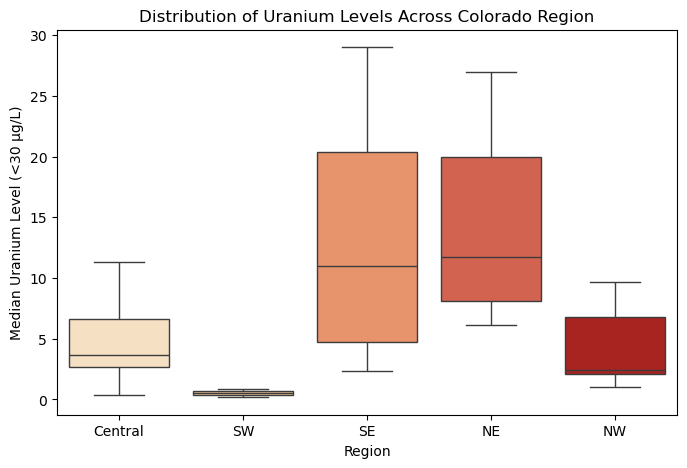

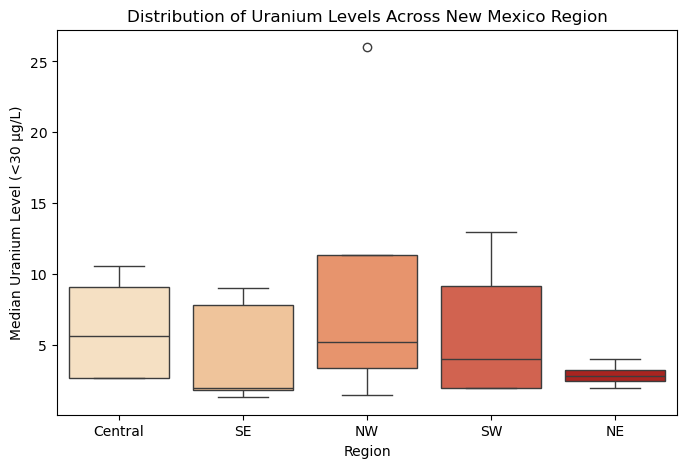

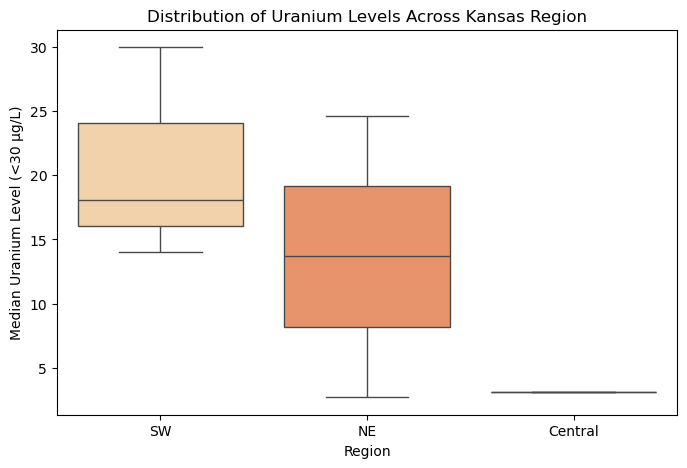

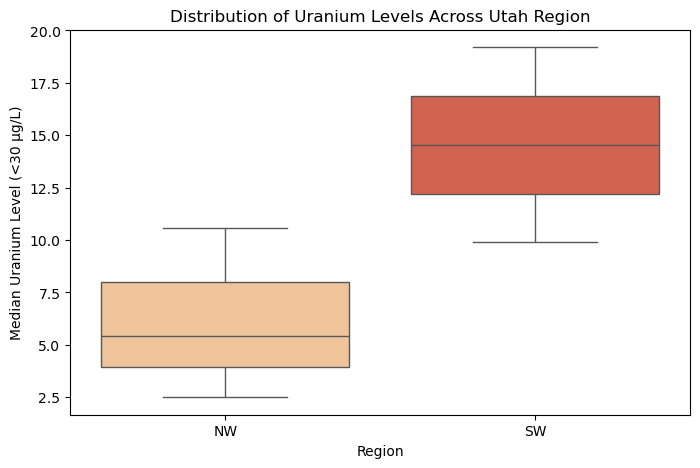

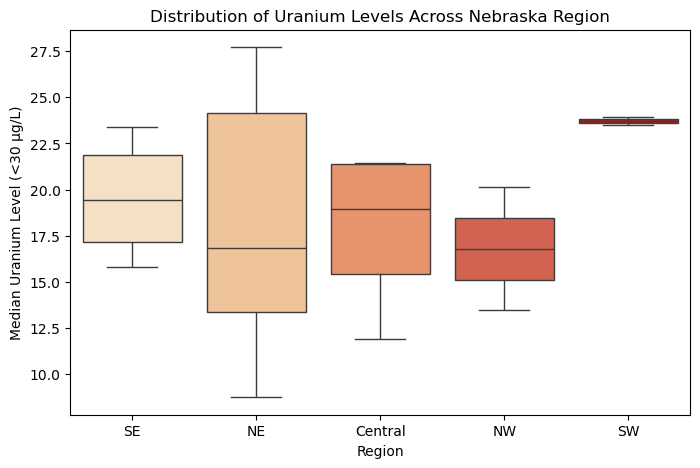

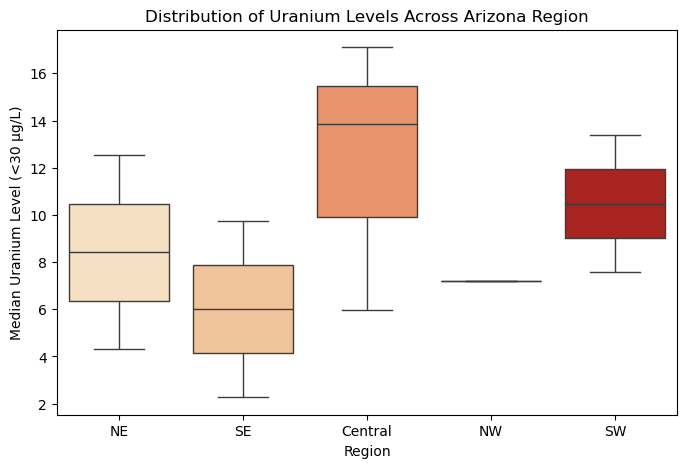

In [36]:
# Research Question 5: Is there a correlation of uranium levels across different regions?
# Colorado
plt.figure(figsize=(8, 5))
sns.boxplot(x="Region", y="Value", data=water_CO, hue= "Region", palette="OrRd", legend = False)
plt.title("Distribution of Uranium Levels Across Colorado Region")
plt.xlabel("Region")
plt.ylabel("Median Uranium Level (<30 \u00b5g/L)")
plt.show()

# New Mexico
plt.figure(figsize=(8, 5))
sns.boxplot(x="Region", y="Value", data=water_NM, hue= "Region", palette="OrRd", legend = False)
plt.title("Distribution of Uranium Levels Across New Mexico Region")
plt.xlabel("Region")
plt.ylabel("Median Uranium Level (<30 \u00b5g/L)")
plt.show()

# Kansas
plt.figure(figsize=(8, 5))
sns.boxplot(x="Region", y="Value", data=water_KS, hue= "Region", palette="OrRd", legend = False)
plt.title("Distribution of Uranium Levels Across Kansas Region")
plt.xlabel("Region")
plt.ylabel("Median Uranium Level (<30 \u00b5g/L)")
plt.show()

# Utah
plt.figure(figsize=(8, 5))
sns.boxplot(x="Region", y="Value", data=water_UT, hue= "Region", palette="OrRd", legend = False)
plt.title("Distribution of Uranium Levels Across Utah Region")
plt.xlabel("Region")
plt.ylabel("Median Uranium Level (<30 \u00b5g/L)")
plt.show()

# Nebraska
plt.figure(figsize=(8, 5))
sns.boxplot(x="Region", y="Value", data=water_NE, hue= "Region", palette="OrRd", legend = False)
plt.title("Distribution of Uranium Levels Across Nebraska Region")
plt.xlabel("Region")
plt.ylabel("Median Uranium Level (<30 \u00b5g/L)")
plt.show()

# Arizona
plt.figure(figsize=(8, 5))
sns.boxplot(x="Region", y="Value", data=water_AZ, hue= "Region", palette="OrRd", legend = False)
plt.title("Distribution of Uranium Levels Across Arizona Region")
plt.xlabel("Region")
plt.ylabel("Median Uranium Level (<30 \u00b5g/L)")
plt.show()

<font color = grey>*Although the median uranium levels remain below the EPA's threshold of 30 µg/L, Colorado's southeastern region shows a concerning range—from 3 µg/L up to nearly 29 µg/L, just below the cutoff. In New Mexico, uranium levels in water are generally low; however, an outlier exceeds 25 µg/L. Kansas displays elevated levels in the northeastern and southwestern regions, with the latter ranging from 14 to 30 µg/L. Utah's southwestern region shows levels between 11 and 20 µg/L. In Nebraska, most regions report values near 20 µg/L, with the southwestern area reaching up to 25 µg/L. By contrast, Arizona shows consistently acceptable uranium levels across all regions.*<font>

<div style="text-align: center;">
  <h1 style="color: lightpink;">Uranium Levels Across Counties & States Surrounding Colorado</h1>
</div>

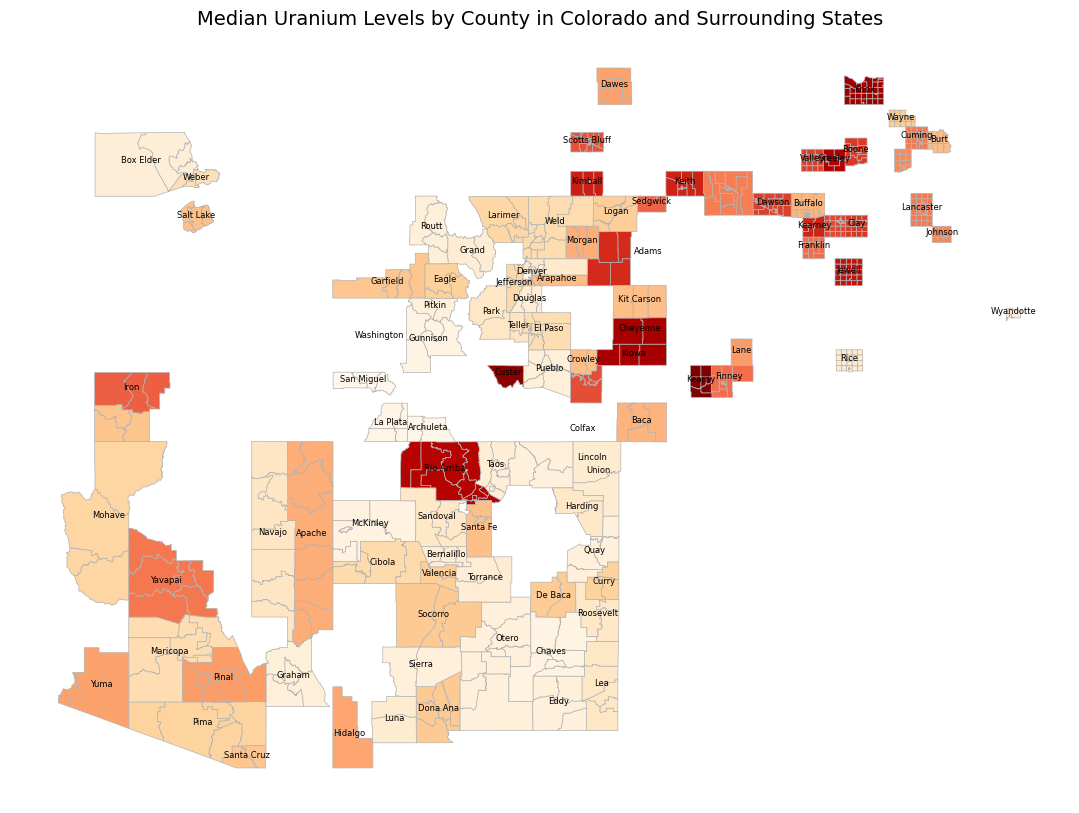

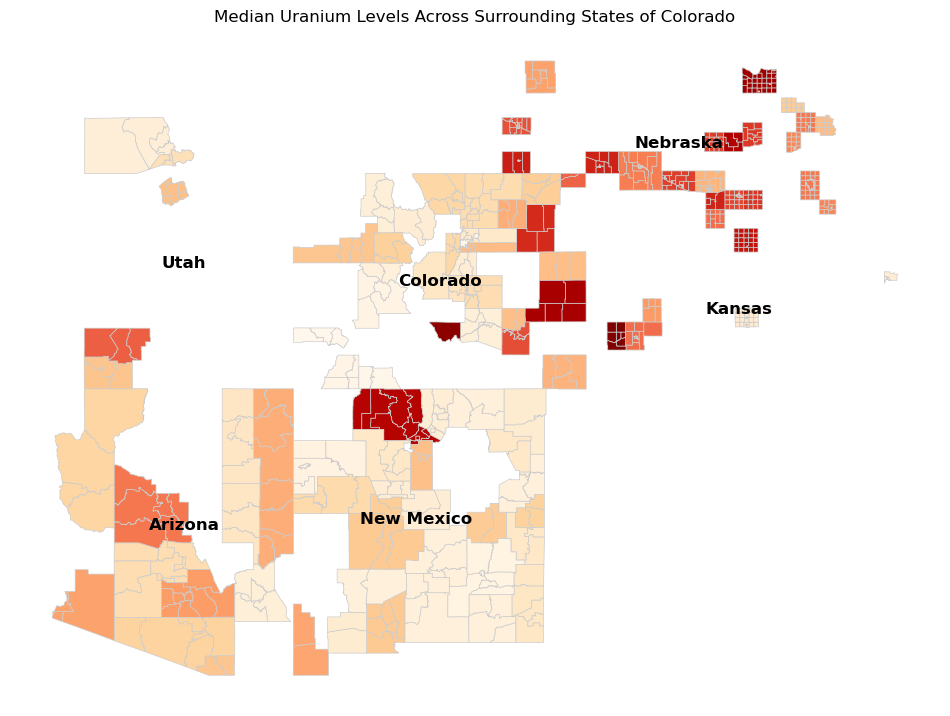

In [37]:
for water in [merged_water_AZ, merged_water_NM, merged_water_KS, merged_water_NE, merged_water_NE, merged_water_CO]:
    gdf.to_crs(epsg=3857, inplace=True)

all_states_water = pd.concat([
    merged_water_AZ,
    merged_water_NM,
    merged_water_KS,
    merged_water_NE,
    merged_water_UT,
    merged_water_CO  
])

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

all_states_water.plot(column='Value', cmap='OrRd', linewidth=0.5, ax=ax, edgecolor='0.7', legend=False)

ax.set_title('Median Uranium Levels by County in Colorado and Surrounding States', fontsize=14)
ax.set_axis_off()

centroids = all_states_water.dissolve(by='County').centroid
centroids = centroids.to_frame(name='geometry')
centroids['County'] = centroids.index

for idx, row in centroids.iterrows():
    ax.annotate(text=row['County'], xy=(row.geometry.x, row.geometry.y), 
                xytext=(0, 0), textcoords="offset points", fontsize=6, ha='center')

# Combine all states into one GeoDataFrame
all_states_uranium = pd.concat([
    merged_water_CO.assign(State='Colorado'),
    merged_water_AZ.assign(State='Arizona'),
    merged_water_NM.assign(State='New Mexico'),
    merged_water_KS.assign(State='Kansas'),
    merged_water_NE.assign(State='Nebraska'),
    merged_water_UT.assign(State='Utah')
])

# Dissolve counties to get one polygon per state
states_dissolved = all_states_uranium.dissolve(by='State')

states_dissolved = states_dissolved.to_crs(epsg=3857)

# Compute centroids
state_centroids = states_dissolved.centroid

# Plot choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
all_states_uranium.plot(column='Value', cmap='OrRd', linewidth=0.5, ax=ax, edgecolor='0.8', legend=False)

# Add state labels at centroids
for state, point in state_centroids.items():
    ax.annotate(text=state, xy=(point.x, point.y), fontsize=12,
                ha='center', va='center', color='black', weight='bold')

ax.set_title('Median Uranium Levels Across Surrounding States of Colorado')
ax.set_axis_off()
plt.show()

<font color = grey>*Due to insufficient uranium testing in many areas, it is challenging to identify a consistent relationship between uranium concentrations in water and regions with radon levels exceeding 4 pCi/L. However, uranium concentrations in community water systems are linked to radon levels, as uranium is a parent element in the natural decay chain that produces radon. The maximum contaminant level (MCL) for uranium in drinking water is set at less than 30 µg/L (micrograms per liter).*<font>